<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1. Data analysis on Tourism arrivals and Singapore's climate

# Part 1.

## 1.1 Contents

- [Background](#1.2-Background)
- [Data Import & Cleaning](#Part-2.-Data-import-&-cleaning)
- [EDA](#Part-3.-EDA)
- [Conclusion](#Part-4.-Conclusion)

## 1.2 Background

In 2018, Singapore generated around 20.42 billion US dollars in the tourism sector alone. This corresponds to 5.1 percent of its the gross domestic product and approximately 14 percent of all international tourism receipts in Southeast Asia.

Singapore Tourism Board(STB) is interested to understand factors that could influence tourist receipts to design strategies to bring in more tourists in the midst of recovery from the COVID pandemic. An executive have been tasked to analyse the significance of climate and economic factors on the amount of tourist receipts.

Singapore has typical tropical climate with abundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. The climate in Singapore influence the type of tourist activities they participate thus STB can strategise to cater to their needs.

STB seek to understand the significance of economic factors such as Unemployment rate, Average national income per citizen (GNI per capita) and exchange rate on tourism arrivals so to manage tourist arrival expectations with the study of economic data.





### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [478]:
def my_mean(input_list):
    i=0
    for i in input_list:
        i+=i
    return i/len(input_list)

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [479]:
def my_sd(input_list):
    mean_diff_list=[]
    for x in input_list:
        mean_diff_list.append(x-my_mean(input_list))
    var=my_mean(mean_diff_list)
    return var**0.5

# Part 2. Data import & cleaning

In [480]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [481]:
#Importing the datasets
df_weather_raw=pd.read_csv('data/historical-daily-weather-records.csv')
df_rainfall_raw=pd.read_csv('data/rainfall-monthly-total.csv')
df_raindays_raw=pd.read_csv('data/rainfall-monthly-number-of-rain-days.csv')
df_unmply_raw=pd.read_csv('data/Unemployment rates.csv')
df_GNI_raw=pd.read_csv('data/GNI per capita PPP.csv')
df_arr=pd.read_excel('data/Tourism arrivals.xlsx', sheet_name='T3',header=10)
df_rcpt=pd.read_excel('data/Tourism receipts.xlsx', sheet_name='T1')
df_Aus_temp_raw=pd.read_csv('data/AusTemp.csv')
df_Aus_pcp_raw=pd.read_csv('data/AusPcp.csv')
df_India_temp_raw=pd.read_csv('data/IndiaTemp.csv')
df_India_pcp_raw=pd.read_csv('data/IndiaPcp.csv')
df_Indon_temp_raw=pd.read_csv('data/IndonTemp.csv')
df_Indon_pcp_raw=pd.read_csv('data/IndonPcp.csv')
df_My_temp_raw=pd.read_csv('data/MalTemp.csv')
df_My_pcp_raw=pd.read_csv('data/MalPcp.csv')
df_Chn_temp_raw=pd.read_csv('data/ChnTemp.csv')
df_Chn_pcp_raw=pd.read_csv('data/ChnPcp.csv')
df_exch_raw=pd.read_csv('data/Exchange Rates.csv')

## 2.1 Cleaning tourism arrival data

In [482]:
#Cleaning tourism arrival data

#To only retain a 10 year period data between 2010 to 2020
df_arr=df_arr.filter(regex='^Data Series$|201[0-9]|2020', axis=1)

In [483]:
#Checking if there are null values
df_arr.isnull().sum().value_counts()

#Dropping null rows
df_arr.dropna(axis=0, inplace=True)

#Checking if there are duplicated columns
for i in range(len(df_arr.columns.duplicated())):
    if df_arr.columns.duplicated()[i] == True:
        print(f'Duplicated value(s) in index position {i}')

In [484]:
#Removing row entries that is not representing a country total arrivals
#To identify the rows which are not a country and to store in a list for removal
df_arr['Data Series']=df_arr['Data Series'].str.strip()
#To observe which geographical location to drop from the data
print(df_arr['Data Series'].unique())
remove_list=['Total International Visitor Arrivals By Inbound Tourism Markets', 'Southeast Asia', 'Greater China', 'South Asia','North Asia', 'West Asia', 'Americas', 'Europe', 'Oceania', 'Africa']
df_arr=df_arr.loc[~df_arr['Data Series'].isin(remove_list)]

['Total International Visitor Arrivals By Inbound Tourism Markets'
 'Southeast Asia' 'Brunei Darussalam' 'Indonesia' 'Malaysia' 'Myanmar'
 'Philippines' 'Thailand' 'Vietnam' 'Other Markets In Southeast Asia'
 'Greater China' 'China' 'Hong Kong SAR' 'Taiwan'
 'Other Markets In Greater China' 'North Asia' 'Japan' 'South Korea'
 'Other Markets In North Asia' 'South Asia' 'Bangladesh' 'India'
 'Pakistan' 'Sri Lanka' 'Other Markets In South Asia' 'West Asia' 'Iran'
 'Israel' 'Kuwait' 'Saudi Arabia' 'United Arab Emirates'
 'Other Markets In West Asia' 'Americas' 'Canada' 'USA'
 'Other Markets In Americas' 'Europe' 'Belgium & Luxembourg' 'Denmark'
 'Finland' 'France' 'Germany' 'Italy' 'Netherlands' 'Norway'
 'Rep Of Ireland' 'Russian Federation' 'Spain' 'Sweden' 'Switzerland'
 'United Kingdom' 'Other Markets In Europe' 'Oceania' 'Australia'
 'New Zealand' 'Other Markets In Oceania' 'Africa' 'Egypt' 'Mauritius'
 'South Africa (Rep Of)' 'Other Markets In Africa' 'Others']


In [485]:
#To transpose the Years as index and the countries as columns
df_arr.rename(columns={'Data Series':'Year'}, inplace=True)
df_arr=df_arr.set_index('Year')
df_arr=df_arr.transpose()

In [486]:
#Mean of average arrivals in each year
for i in df_arr.columns:
    df_arr[i]=df_arr[i].rolling(window=12).mean()[11::12]
#To drop the NaN values in the dataset
df_arr_mean=df_arr.dropna(axis=0)
#To rename the index column
df_arr_mean.index=list(range(2010,2021))[::-1] #understand how to rename index with customisable replacement

In [487]:
#To understand the top 5 average source of tourism arrivals 
df_arr_mean.describe().loc['mean'].nlargest()

Year
Indonesia    219844.946970
China        184662.045455
Malaysia      91238.909091
India         82494.030303
Australia     81035.666667
Name: mean, dtype: float64

Top 5 countries -> thus use these country data to investigate

## 2.2 Cleaning tourism receipts data

In [488]:
#Inspecting tourist receipts data
print(df_rcpt.shape)
df_rcpt.info()
df_rcpt.head(5)

(37, 60)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 60 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   31 non-null     object
 1   Unnamed: 1   7 non-null      object
 2   Unnamed: 2   7 non-null      object
 3   Unnamed: 3   7 non-null      object
 4   Unnamed: 4   7 non-null      object
 5   Unnamed: 5   7 non-null      object
 6   Unnamed: 6   7 non-null      object
 7   Unnamed: 7   7 non-null      object
 8   Unnamed: 8   7 non-null      object
 9   Unnamed: 9   7 non-null      object
 10  Unnamed: 10  7 non-null      object
 11  Unnamed: 11  7 non-null      object
 12  Unnamed: 12  7 non-null      object
 13  Unnamed: 13  7 non-null      object
 14  Unnamed: 14  7 non-null      object
 15  Unnamed: 15  7 non-null      object
 16  Unnamed: 16  7 non-null      object
 17  Unnamed: 17  7 non-null      object
 18  Unnamed: 18  7 non-null      object
 19  Unnamed: 19  7 non-nul

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,Theme: Industry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Subject: Tourism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Topic: Tourism Receipts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Table Title: Tourism Receipts By Major Compone...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [489]:
#Cleaning tourist receipts data
#Removing uneccessary rows
df_rcpt=df_rcpt.iloc[9:16].copy()

In [490]:
#To rename the column variable with the 1st row 
df_rcpt.rename(columns=df_rcpt.iloc[0],inplace=True) #How to make a row to be the header
df_rcpt=df_rcpt.iloc[1:]

In [491]:
#To retain the 10 year period data between year 2010-2020
df_rcpt=df_rcpt.filter(regex='^Data Series$|201[0-9]|2020', axis=1)

In [492]:
#Transforming the dataset where the columns are Types of expenditure and the row indexes are Year periods
df_rcpt.rename(columns={'Data Series':'Year'}, inplace=True)
df_rcpt.set_index('Year', inplace=True)
df_rcpt=df_rcpt.transpose()

In [493]:
#Checking for null values 
df_rcpt.isnull().sum().value_counts()

0    6
dtype: int64

In [494]:
#To compute the mean annual tourism receipts 
for i in df_rcpt.columns:
    df_rcpt[i]=df_rcpt[i].rolling(window=4).mean()[3::4]
df_rcpt_mean=df_rcpt

In [495]:
#To drop null cells and rename the index to each year
df_rcpt_mean.dropna(inplace=True)
df_rcpt_mean.index=list(range(2010,2021))[::-1]

## 2.3 Cleaning tourist country's precipitation and temperature data

In [496]:
#Creating a function to format the data of Precipitation and Temperature of various countries
def clean_data(data):
    #To break up the multi indexing of the data
    data.reset_index(inplace=True)
    #Restructuring the right row and column entries
    data.rename(columns=data.iloc[0],inplace=True)
    data=data.iloc[1:]
    data.columns = ['Period' if pd.isna(col) else col for col in data.columns]
    
    #To check for null values and drop columns if any
    if any(i!=0 for i in data.isnull().sum().values):
            data=data.copy()
            data.dropna(axis=1, inplace=True)
    #To change data type under Period column
    data1=data.copy()
    data1['Period']=data1['Period'].astype('int')
    data1=data1.set_index('Period')
    #To change data type of temperature and precipitation values to int
    data1=data1.apply(pd.to_numeric)
    return data1

In [497]:
#Assigning formatted each countries precepipitation and temperature data
df_Aus_pcp=clean_data(df_Aus_pcp_raw)
df_Aus_temp=clean_data(df_Aus_temp_raw)
df_India_pcp=clean_data(df_India_pcp_raw)
df_India_temp=clean_data(df_India_temp_raw)
df_Indon_pcp=clean_data(df_Indon_pcp_raw)
df_Indon_temp=clean_data(df_Indon_temp_raw)
df_My_pcp=clean_data(df_My_pcp_raw)
df_My_temp=clean_data(df_My_temp_raw)
df_China_pcp=clean_data(df_Chn_pcp_raw)
df_China_temp=clean_data(df_Chn_temp_raw)

## 2.4 Cleaning Singapore's precipitation and temperature data

In [498]:
#Inspecting Singapore precipitation data
print(df_rainfall_raw.shape)
print(df_rainfall_raw.info())
df_rainfall_raw.head(3)

(488, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           488 non-null    object 
 1   total_rainfall  488 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB
None


,month,total_rainfall
0,1982-01,107.1
1,1982-02,27.8
2,1982-03,160.8


There are no null values in SG's precipitation data but the periods are in months which is not ideal as we will want to work on using annual data.

In [499]:
#Cleaning Singapore precipitation data
#Annualization of rainfall data
df_rainfall_raw['month']=pd.to_datetime(df_rainfall_raw['month'])
df_rain_series=df_rainfall_raw.groupby(pd.Grouper(key='month', freq='Y'))['total_rainfall'].mean()
df_SG_mean_rainfall=pd.DataFrame(df_rain_series)
df_SG_mean_rainfall.reset_index(inplace=True)
df_SG_mean_rainfall.rename(columns={'month':'Year'}, inplace=True)
df_SG_mean_rainfall['Year']=list(range(1982,2023))

In [500]:
#Inspecting Singapore's weather data
print(df_weather_raw.shape)
df_weather_raw.info()
df_weather_raw.head(10)

(2859, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2859 entries, 0 to 2858
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   date                      2859 non-null   object
 1   station                   2859 non-null   object
 2   daily_rainfall_total      2859 non-null   object
 3   highest_30_min_rainfall   2859 non-null   object
 4   highest_60_min_rainfall   2859 non-null   object
 5   highest_120_min_rainfall  2859 non-null   object
 6   mean_temperature          2859 non-null   object
 7   maximum_temperature       2859 non-null   object
 8   minimum_temperature       2859 non-null   object
 9   mean_wind_speed           2859 non-null   object
 10  max_wind_speed            2859 non-null   object
dtypes: object(11)
memory usage: 245.8+ KB


,date,station,daily_rainfall_total,highest_30_min_rainfall,highest_60_min_rainfall,highest_120_min_rainfall,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed
0,2009-01-01,Admiralty,na,na,na,na,na,na,na,na,na
1,2009-01-02,Admiralty,na,na,na,na,na,na,na,na,na
2,2009-01-03,Admiralty,na,na,na,na,na,na,na,na,na
3,2009-01-04,Admiralty,na,na,na,na,na,na,na,na,na
4,2009-01-05,Admiralty,na,na,na,na,na,na,na,na,na
5,2009-01-06,Admiralty,na,na,na,na,na,na,na,na,na
6,2009-01-07,Admiralty,na,na,na,na,na,na,na,na,na
7,2009-01-08,Admiralty,na,na,na,na,na,na,na,na,na
8,2009-01-09,Admiralty,na,na,na,na,na,na,na,na,na
9,2009-01-10,Admiralty,na,na,na,na,na,na,na,na,na


From the summarised information of the weather data there is no null values, however, with a look into the data the supposedly null value entries are replaced with the string 'na'. Thus, the cleaning process drop these values as well as irrelevant columns not use in this analysis. Additionally, the data are recorded on daily basis and we need to annualize the data.

In [501]:
#Cleaning weather data
#Dropping irrelevant columns
col_remove=list(df_weather_raw.columns)
col_remove.remove('date')
col_remove.remove('mean_temperature')
df_weather_raw.drop(col_remove, axis=1, inplace=True)

#Dropping null values in data
df_weather_raw.replace('na', np.nan, inplace=True)
df_weather_raw.dropna(axis=0, inplace=True)

#Type casting datatypes
df_weather_raw['date']=pd.to_datetime(df_weather_raw['date'])
df_weather_raw['mean_temperature']=df_weather_raw['mean_temperature'].astype('float')

df_weather_raw.reset_index(drop=True, inplace=True)
df_SG_temp=df_weather_raw.copy()

In [502]:
#Computing the annual mean temperature
df_temp_series=df_SG_temp.groupby(pd.Grouper(key='date', freq='Y'))['mean_temperature'].mean()
df_SG_mean_temp=pd.DataFrame(df_temp_series)
df_SG_mean_temp.reset_index(inplace=True)
df_SG_mean_temp.rename(columns={'date':'Year'}, inplace=True)
df_SG_mean_temp['Year']=list(range(2009,2018))

In [503]:
#Cleaning SG rainfall daily data
#Inspecting the data
print(df_raindays_raw.shape)
print(df_raindays_raw.info())
df_raindays_raw.head()

(488, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             488 non-null    object
 1   no_of_rainy_days  488 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.8+ KB
None


,month,no_of_rainy_days
0,1982-01,10
1,1982-02,5
2,1982-03,11
3,1982-04,14
4,1982-05,10


In [504]:
#Checking for null values
print(df_raindays_raw.isnull().sum())
print('---------------------')
#Checking for duplicate values
print(f'There are {df_raindays_raw.duplicated().sum()} duplicated rows')

month               0
no_of_rainy_days    0
dtype: int64
---------------------
There are 0 duplicated rows


In [505]:
#Computing the annual total rainy days
df_raindays_raw['month']=pd.to_datetime(df_raindays_raw['month'])
df_raindays=df_raindays_raw.groupby(pd.Grouper(key='month',freq='Y')).sum()
df_raindays.reset_index(inplace=True)
df_raindays.rename(columns={'month':'Year'}, inplace=True)
df_raindays['Year']=list(range(1982,2023))

## 2.5 Cleaning exchange rate data

In [506]:
#Inspecting the exchange rate data
print(df_exch_raw.info())
print(df_exch_raw.shape)
df_exch_raw.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   MAS: Financial Database - Exchange Rates  18 non-null     object
 1   Unnamed: 1                                14 non-null     object
 2   Unnamed: 2                                14 non-null     object
 3   Unnamed: 3                                14 non-null     object
 4   Unnamed: 4                                14 non-null     object
 5   Unnamed: 5                                14 non-null     object
dtypes: object(6)
memory usage: 1.2+ KB
None
(22, 6)


,MAS: Financial Database - Exchange Rates,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Exchange Rates (Yearly),NaN,NaN,NaN,NaN,NaN
2,2010 to 2022,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,End of Period,S$ Per 100 Units of Australian Dollar,S$ Per 100 Units of Chinese Renminbi,S$ Per 100 Units of Indian Rupee,S$ Per 100 Units of Indonesian Rupiah,S$ Per 100 Units of Malaysian Ringgit
6,2010,130.91,19.53,2.87,0.01431,41.75
7,2011,132,20.61,2.4445,0.014192,40.94
8,2012,127.11,19.62,2.2307,0.012681,39.95
9,2013,112.9,20.91,2.0463,0.010388,38.56


In [507]:
#Cleaning the exchange rate data
#Dropping the rows with NaN values
df_exch_raw.dropna(axis=0, inplace=True)

#Renaming the column headers
df_exch_raw.rename(columns=df_exch_raw.iloc[0], inplace=True)
df_exch=df_exch_raw.iloc[1:].copy()
df_exch.columns=['Year','AUD', 'RMB', 'INR', 'IDR', 'MYR']
df_exch.reset_index(drop=True, inplace=True)
df_exch['Year']=df_exch['Year'].astype('int')

In [508]:
#Inspecting the data again
df_exch.info()
#Changing exchange rates from str type to int
df_exch[['AUD','RMB', 'INR', 'IDR', 'MYR']]=df_exch[['AUD','RMB', 'INR', 'IDR', 'MYR']].astype('float')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    13 non-null     int64 
 1   AUD     13 non-null     object
 2   RMB     13 non-null     object
 3   INR     13 non-null     object
 4   IDR     13 non-null     object
 5   MYR     13 non-null     object
dtypes: int64(1), object(5)
memory usage: 752.0+ bytes


## 2.6 Cleaning Unemployment and GNI per capita data

In [509]:
#Inspecting unemployment data
print(df_unmply_raw.shape)
df_unmply_raw.info()
df_unmply_raw.head()

(10, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series Name    7 non-null      object 
 1   Series Code    5 non-null      object 
 2   Country Name   5 non-null      object 
 3   Country Code   5 non-null      object 
 4   2010 [YR2010]  5 non-null      float64
 5   2011 [YR2011]  5 non-null      float64
 6   2012 [YR2012]  5 non-null      float64
 7   2013 [YR2013]  5 non-null      float64
 8   2014 [YR2014]  5 non-null      float64
 9   2015 [YR2015]  5 non-null      float64
 10  2016 [YR2016]  5 non-null      float64
 11  2017 [YR2017]  5 non-null      float64
 12  2018 [YR2018]  5 non-null      float64
 13  2019 [YR2019]  5 non-null      float64
 14  2020 [YR2020]  5 non-null      float64
 15  2021 [YR2021]  5 non-null      float64
dtypes: float64(12), object(4)
memory usage: 1.4+ KB


,Series Name,Series Code,Country Name,Country Code,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,Malaysia,MYS,3.390,3.050,3.100,3.160,2.880,3.100,3.440,3.410,3.30,3.26,4.540,4.046
1,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,China,CHN,4.530,4.550,4.580,4.600,4.630,4.650,4.560,4.470,4.31,4.56,5.000,4.550
2,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,Indonesia,IDN,5.610,5.150,4.470,4.340,4.050,4.510,4.300,3.780,4.39,3.59,4.250,3.830
3,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,India,IND,8.319,8.168,8.095,8.037,7.981,7.915,7.842,7.733,7.65,6.51,10.195,7.713
4,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,Australia,AUS,5.210,5.080,5.220,5.660,6.080,6.050,5.710,5.590,5.30,5.16,6.460,5.120


In [510]:
#Dropping null values
df_unmply_raw.dropna(axis=0, inplace=True)

#Removing irrelevant columns
df_unmply=df_unmply_raw.drop(['Series Name', 'Series Code','Country Code', '2021 [YR2021]'], axis=1)

In [511]:
#Renaming the indexes before transpose
df_unmply.columns=df_unmply.columns.str.replace('\[.*\]', '', regex=True)
new_col_list=list(map(int,df_unmply.columns[1:]))
new_col_list.insert(0, 'Period')
df_unmply.columns=new_col_list

In [512]:
#Renaming the columns before transpose
def add_str(x):
    return x + '_u_rate'
df_unmply['Period']=df_unmply['Period'].apply(add_str)

In [513]:
#Having the years as index
df_unmply.set_index('Period',drop=True, inplace=True)
df_unmply=df_unmply.transpose()
df_unmply.sort_index(ascending=False, inplace=True)

In [514]:
#Inspecting GNI per capita PPP data
print(df_GNI_raw.shape)
df_GNI_raw.info()
df_GNI_raw.head()

(10, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series Name    7 non-null      object 
 1   Series Code    5 non-null      object 
 2   Country Name   5 non-null      object 
 3   Country Code   5 non-null      object 
 4   2010 [YR2010]  5 non-null      float64
 5   2011 [YR2011]  5 non-null      float64
 6   2012 [YR2012]  5 non-null      float64
 7   2013 [YR2013]  5 non-null      float64
 8   2014 [YR2014]  5 non-null      float64
 9   2015 [YR2015]  5 non-null      float64
 10  2016 [YR2016]  5 non-null      float64
 11  2017 [YR2017]  5 non-null      float64
 12  2018 [YR2018]  5 non-null      float64
 13  2019 [YR2019]  5 non-null      float64
 14  2020 [YR2020]  5 non-null      float64
 15  2021 [YR2021]  5 non-null      float64
dtypes: float64(12), object(4)
memory usage: 1.4+ KB


,Series Name,Series Code,Country Name,Country Code,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,Malaysia,MYS,19510.0,20800.0,21700.0,22190.0,23220.0,23510.0,24180.0,25200.0,26620.0,28090.0,26700.0,28150.0
1,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,China,CHN,9220.0,10200.0,11140.0,11780.0,12500.0,12840.0,13420.0,14220.0,15430.0,16610.0,17050.0,19160.0
2,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,Indonesia,IDN,8210.0,8770.0,9370.0,9710.0,9890.0,9880.0,10150.0,10600.0,11320.0,11980.0,11820.0,12680.0
3,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,India,IND,4170.0,4430.0,4770.0,4950.0,5130.0,5350.0,5660.0,6050.0,6520.0,6820.0,6360.0,7130.0
4,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,Australia,AUS,37840.0,40330.0,41540.0,44770.0,45660.0,45310.0,46140.0,47090.0,48620.0,50170.0,51870.0,55330.0


In [515]:
#Dropping null values
df_GNI_raw.dropna(axis=0, inplace=True)

#Removing irrelevant columns
df_GNI=df_GNI_raw.drop(['Series Name', 'Series Code','Country Code', '2021 [YR2021]'], axis=1)

In [516]:
#Renaming the indexes before transpose
df_GNI.columns=df_GNI.columns.str.replace('\[.*\]', '', regex=True)
new_col_list=list(map(int,df_GNI.columns[1:]))
new_col_list.insert(0, 'Period')
df_GNI.columns=new_col_list

In [517]:
#Renaming the columns before transpose
def add_str(x):
    return x + '_GNI'
df_GNI['Period']=df_GNI['Period'].apply(add_str)

In [518]:
#Having the years as index
df_GNI.set_index('Period',drop=True, inplace=True)
df_GNI=df_GNI.transpose()
df_GNI.sort_index(ascending=False, inplace=True)

## 2.7 Data Dictonary

|Feature|Type|Dataset|Description|
|---|---|---|---| 
|Average tourist arrivals|float|df_arr_mean|Annual average of tourist arrivals from different countries to Singapore between 2010 to 2020 |
|Tourism Receipts|float|df_rcpt_mean|Annual average of tourist receipts spend in Singapore between 2010 to 2020|
|Australia|float|df_Aus_pcp|Annualised total rainfall in all parts of Australia between 1901 to 2021|
|Australia|float|df_Aus_temp|Annualised average temperature in all parts of Australia between 1901 to 2021|
|India|float|df_India_pcp|Annualised total rainfall in all parts of India between 1901 to 2021|
|India|float|df_India_temp|Annualised average temperature in all parts of India between 1901 to 2021|
|Indonesia|float|df_Indon_pcp|Annualised total rainfall in all parts of Indonesia between 1901 to 2021|
|Indonesia|float|df_Indon_temp|Annualised average temperature in all parts of Indonesia between 1901 to 2021|
|Malaysia|float|df_My_pcp|Annualised total rainfall in all parts of Malaysia between 1901 to 2021|
|Malaysia|float|df_My_temp|Annualised average temperature in all parts of Malaysia between 1901 to 2021|
|China|float|df_China_pcp|Annualised total rainfall in all parts of China between 1901 to 2021|
|China|float|df_China_temp|Annualised average temperature in all parts of China between 1901 to 2021|
|total_rainfall|float|df_SG_mean_rainfall|Annual average rainfall in Singapore in mm between 1982 to 2022|
|mean_temperature|float|df_SG_mean_temp|Annual average temperature in Singapore between 2009 to 2017|
|no_of_rainy_days|float|df_raindays|Total rainy days in a year between 1982 to 2022|
|AUD/RMB/INR/IDR/MYR|float|df_exch|Average exchange rate of AUD/RMB/INR/IDR/MYR per $100 SGD between 2010 to 2020|
|Malaysia/China/Indonesia/India/Australia_u_rate|float|df_unmply|Unemployment rate of the respective countries between 2010 to 2020|
|Malaysia/China/Indonesia/India/Australia_GNI|float|df_GNI|GNI per capita PPP of the respective countries between 2010 to 2020|

# Part 3. EDA

Starter code questions:

In [519]:
#Function to find the SD of each column in a dataframe
def sd_df(data):
    value_list=[]
    for col in data.columns:
        value_list.append(my_sd(data[col]))
    return dict(zip(data.columns,value_list))    

- Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?

In [520]:
#Highest & lowest rainfall in 1990, 2000, 2010 and 2020
for i in [1990, 2000, 2010, 2020]: 
    high=df_rainfall_raw[df_rainfall_raw['month'].dt.year==i]
    print(f"Highest rainfall in {i} is in {high.loc[high['total_rainfall'].idxmax()]['month']}")
for i in [1990, 2000, 2010, 2020]: 
    low=df_rainfall_raw[df_rainfall_raw['month'].dt.year==i]
    print(f"Lowest rainfall in {i} is in {low.loc[low['total_rainfall'].idxmin()]['month']}")

Highest rainfall in 1990 is in 1990-09-01 00:00:00
Highest rainfall in 2000 is in 2000-11-01 00:00:00
Highest rainfall in 2010 is in 2010-07-01 00:00:00
Highest rainfall in 2020 is in 2020-05-01 00:00:00
Lowest rainfall in 1990 is in 1990-02-01 00:00:00
Lowest rainfall in 2000 is in 2000-09-01 00:00:00
Lowest rainfall in 2010 is in 2010-02-01 00:00:00
Lowest rainfall in 2020 is in 2020-02-01 00:00:00


In [521]:
print(f"Highest rainfall is in year {df_SG_mean_rainfall.loc[df_SG_mean_rainfall['total_rainfall'].idxmax()]['Year']}")

print(f"Lowest rainfall is in year {df_SG_mean_rainfall.loc[df_SG_mean_rainfall['total_rainfall'].idxmin()]['Year']}")     

Highest rainfall is in year 2007.0
Lowest rainfall is in year 1997.0


In [522]:
#Highest & lowest raindays in 1990, 2000, 2010 and 2020
for i in [1990, 2000, 2010, 2020]: 
    high_days=df_raindays_raw[df_raindays_raw['month'].dt.year==i]
    print(f"Highest raindays in {i} is in {high_days.loc[high_days['no_of_rainy_days'].idxmax()]['month']}")
for i in [1990, 2000, 2010, 2020]: 
    low_days=df_raindays_raw[df_raindays_raw['month'].dt.year==i]
    print(f"Lowest raindays in {i} is in {low_days.loc[low_days['no_of_rainy_days'].idxmin()]['month']}")

Highest raindays in 1990 is in 1990-09-01 00:00:00
Highest raindays in 2000 is in 2000-11-01 00:00:00
Highest raindays in 2010 is in 2010-11-01 00:00:00
Highest raindays in 2020 is in 2020-07-01 00:00:00
Lowest raindays in 1990 is in 1990-03-01 00:00:00
Lowest raindays in 2000 is in 2000-05-01 00:00:00
Lowest raindays in 2010 is in 2010-02-01 00:00:00
Lowest raindays in 2020 is in 2020-01-01 00:00:00


In [523]:
#Plot box whiskers to find outliers
df_raindays_raw

,month,no_of_rainy_days
0,1982-01-01,10
1,1982-02-01,5
2,1982-03-01,11
3,1982-04-01,14
4,1982-05-01,10
...,...,...
483,2022-04-01,18
484,2022-05-01,12
485,2022-06-01,17
486,2022-07-01,16


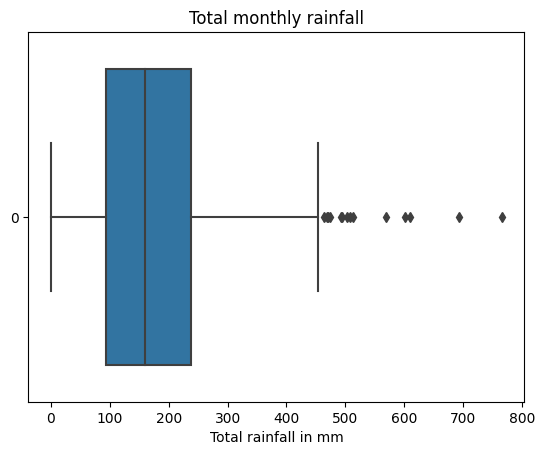

In [524]:
box1=sns.boxplot(data=df_rainfall_raw['total_rainfall'], orient='h')
box1.set(xlabel="Total rainfall in mm", title='Total monthly rainfall');

There exist multiple outliers above the upper whisker

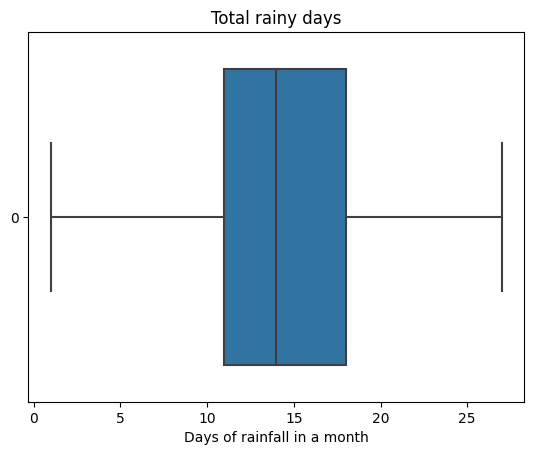

In [525]:
box2=sns.boxplot(data=df_raindays_raw['no_of_rainy_days'], orient='h')
box2.set(xlabel="Days of rainfall in a month", title='Total rainy days');

There are no outliers

## 3.1 Correlation between tourist arrivals and receipts

In [526]:
#Investigating if there are relations between tourism arrivals and receipts
#Concatenating the Tourism arrival and receipts data
df_concat=pd.concat([df_arr_mean,df_rcpt_mean['Tourism Receipts']], axis=1)

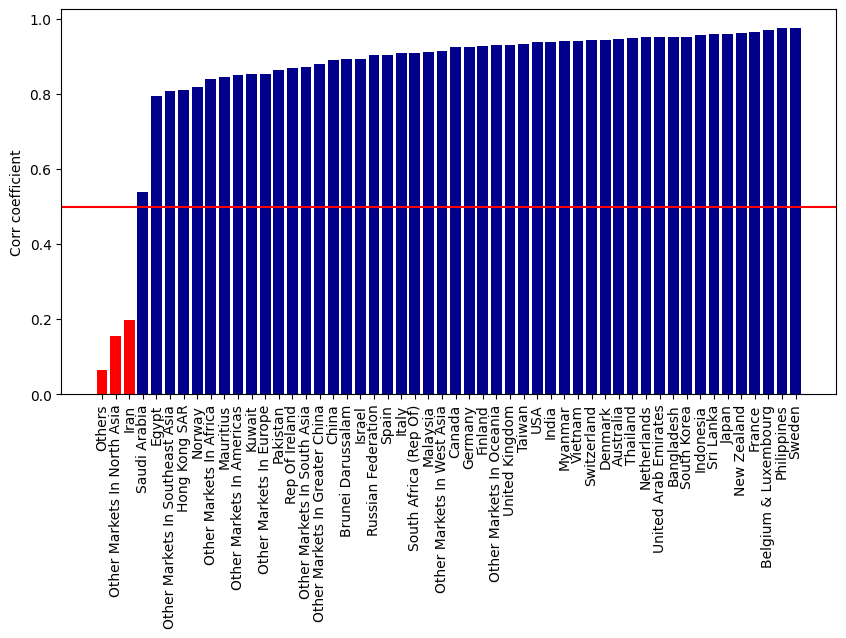

In [527]:
#Getting the correlations between tourism receipts and arrivals
df_tour_corr=df_concat.corr()

#To sort the correlation data from lowest to highest
corr_series=df_tour_corr['Tourism Receipts'].sort_values(ascending=True)[:-1]

#Plotting the distribution of correlations across multiple countries
plt.figure(figsize=(10, 5))
plt.bar(corr_series.index,corr_series, color=['red' if i <0.5 else 'darkblue' for i in corr_series.values])
plt.axhline(y=0.5, color='red')
plt.xticks(rotation=90)
plt.ylabel('Corr coefficient');

Only 3 countries display weak correlation between tourism arrivals and receipts. As expected, there is a strong positive relationship between arrivals and receipts thus attracting more arrivals will be crucial to boost tourism expenditures.

##  3.2 Factors that have potential influence over tourist arrivals

###  3.2.1 Temperature and tourism arrivals

In [528]:
#Creating a function to concat each country tourist arrivals and respective mean temperature
def concat_data(df_country_temp,country):
    #Preparing temperature data of country
    df1=df_country_temp.loc[2010:2020,[country]].iloc[::-1]
    #Preparing arrival data
    df2=df_arr_mean[[country]]
    df2.columns=['mean arrivals']
    #Concatenate the 2 dataframes
    data=pd.concat([df2,df1], axis = 1)
    return data

In [529]:
#Creating a dictionary where the keys are strings of Country names and values as the respective dataframes
list_temp=[df_Aus_temp, df_Indon_temp, df_China_temp, df_My_temp, df_India_temp]
list_country=['Australia', 'Indonesia', 'China', 'Malaysia', 'India']
dict_temp=dict(zip(list_country, list_temp))

In [530]:
#For loop to run the concat function across all the countries data and storing in a list
list_df_temp_arr=[]
for i,j in dict_temp.items():
    list_df_temp_arr.append(concat_data(j,i))

In [531]:
#Assigning the dataframes
Australia_arr_temp=list_df_temp_arr[0]
Indonesia_arr_temp=list_df_temp_arr[1]
China_arr_temp=list_df_temp_arr[2]
Malaysia_arr_temp=list_df_temp_arr[3]
India_arr_temp=list_df_temp_arr[4]

In [532]:
#Creating a function to plot a scatterplot between country temp and arrivals
def scatplot_temp(df,country):
    df=df.sort_values(by=country)
    scat=plt.scatter(df[country],df['mean arrivals'], c=df.index, cmap='binary')
    plt.xlabel('Mean temperature')
    plt.ylabel('Average tourist arrivals')
    plt.yticks(ticks=[0,50000,100000,150000,200000,250000,300000])
    plt.legend(*scat.legend_elements(), title="Period")

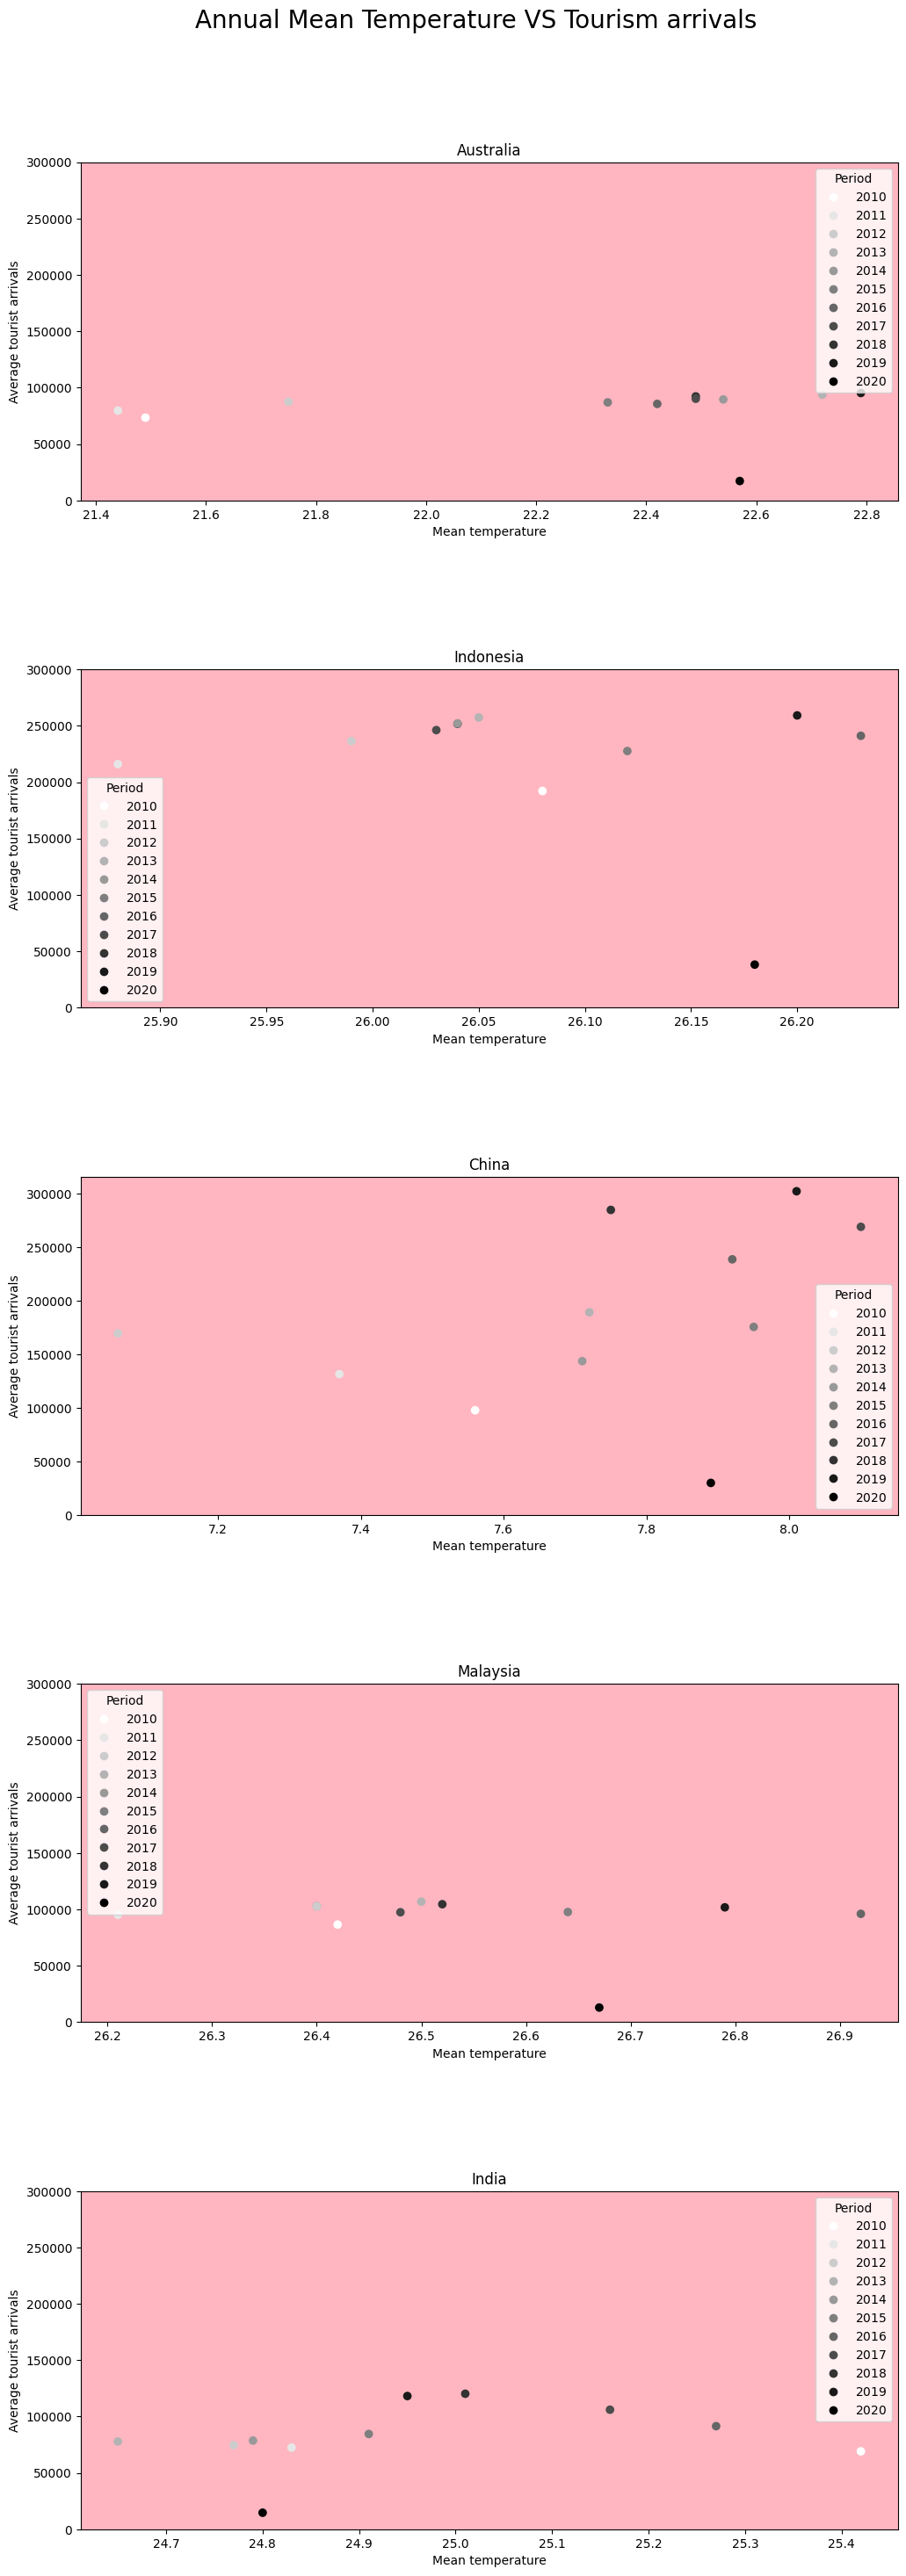

In [533]:
fig_temp, axs_temp=plt.subplots(5,1)
fig_temp.set_size_inches(12, 35)
fig_temp.suptitle('Annual Mean Temperature VS Tourism arrivals', y=0.93, fontsize= 20)
for i in axs_temp:
    i.set_facecolor('lightpink')

plt.subplot(5,1,1)
scatplot_temp(Australia_arr_temp,'Australia')
axs_temp[0].set_title('Australia')

plt.subplot(5,1,2)
scatplot_temp(Indonesia_arr_temp,'Indonesia')
axs_temp[1].set_title('Indonesia')

plt.subplot(5,1,3)
scatplot_temp(China_arr_temp,'China')
axs_temp[2].set_title('China')

plt.subplot(5,1,4)
scatplot_temp(Malaysia_arr_temp,'Malaysia')
axs_temp[3].set_title('Malaysia')

plt.subplot(5,1,5)
scatplot_temp(India_arr_temp,'India')
axs_temp[4].set_title('India')

plt.subplots_adjust(hspace=0.5);

Conclusion:
- Vertical, no relationship
- China seems positive but EDA based on average temp where there are significant variance between different locations within china

###  3.2.2 Precipitation and tourism arrivals

In [534]:
#Creating a dictionary where the keys are strings of Country names and values as the respective dataframes
list_pcp=[df_Aus_pcp, df_Indon_pcp, df_China_pcp, df_My_pcp, df_India_pcp]
list_country=['Australia', 'Indonesia', 'China', 'Malaysia', 'India']
dict_pcp=dict(zip(list_country, list_pcp))

In [535]:
#For loop to run the concat function across all the countries data and storing in a list
list_df_pcp_arr=[]
for i,j in dict_pcp.items():
    list_df_pcp_arr.append(concat_data(j,i))

In [536]:
#Assigning the dataframes
Australia_arr_pcp=list_df_pcp_arr[0]
Indonesia_arr_pcp=list_df_pcp_arr[1]
China_arr_pcp=list_df_pcp_arr[2]
Malaysia_arr_pcp=list_df_pcp_arr[3]
India_arr_pcp=list_df_pcp_arr[4]

In [537]:
#Creating a function to plot a scatterplot between country precipitation and arrivals
def scatplot_pcp(df,country):
    df=df.sort_values(by=country)
    scat=plt.scatter(df[country],df['mean arrivals'], c=df.index, cmap='binary')
    plt.xlabel('Mean precipitation in millimetres')
    plt.ylabel('Average tourist arrivals')
    plt.yticks(ticks=[0,50000,100000,150000,200000,250000,300000])
    plt.legend(*scat.legend_elements(), title="Period")

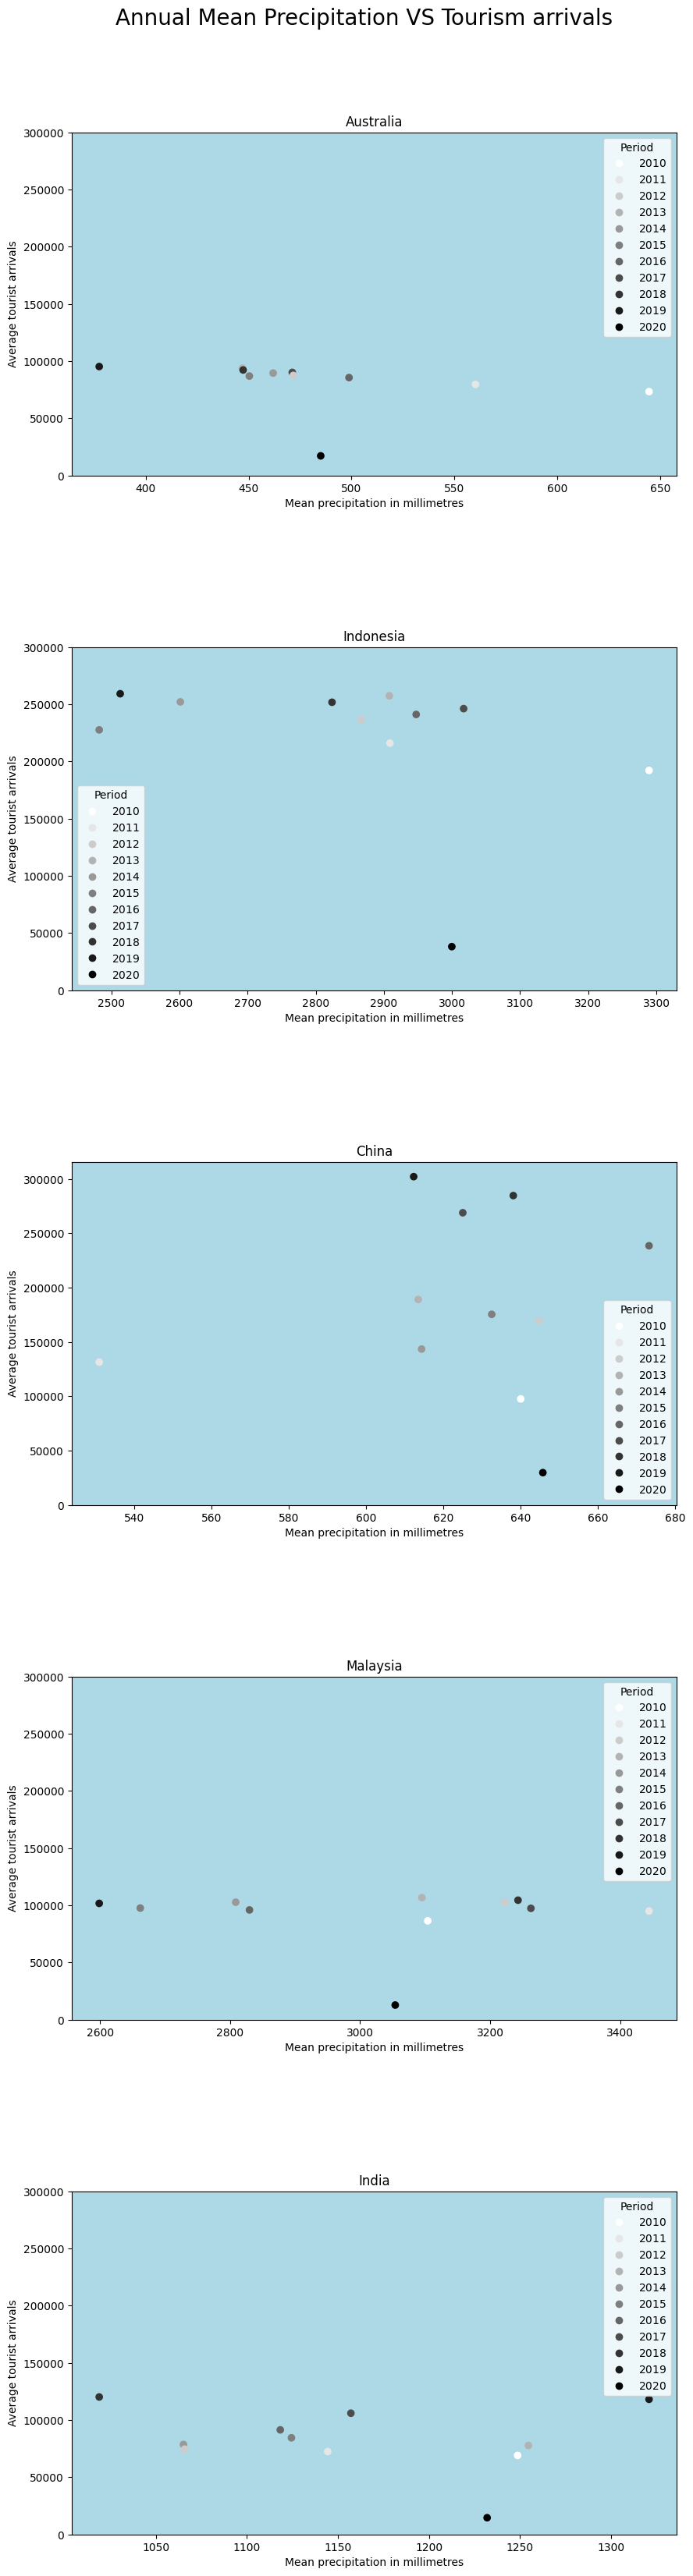

In [538]:
fig_pcp, axs_pcp=plt.subplots(5,1)
fig_pcp.set_size_inches(10, 40)
fig_pcp.suptitle('Annual Mean Precipitation VS Tourism arrivals', y=0.92, fontsize= 20)
for i in axs_pcp:
    i.set_facecolor('lightblue')

plt.subplot(5,1,1)
scatplot_pcp(Australia_arr_pcp,'Australia')
axs_pcp[0].set_title('Australia')

plt.subplot(5,1,2)
scatplot_pcp(Indonesia_arr_pcp,'Indonesia')
axs_pcp[1].set_title('Indonesia')

plt.subplot(5,1,3)
scatplot_pcp(China_arr_pcp,'China')
axs_pcp[2].set_title('China')

plt.subplot(5,1,4)
scatplot_pcp(Malaysia_arr_pcp,'Malaysia')
axs_pcp[3].set_title('Malaysia')

plt.subplot(5,1,5)
scatplot_pcp(India_arr_pcp,'India')
axs_pcp[4].set_title('India')

plt.subplots_adjust(hspace=0.5);

Conclusion:
- Vertical, no relationship
- China seems positive but EDA based on average temp where there are significant variance between different locations within china

###  3.2.3 Exchange rate and tourism arrivals

In [539]:
#Preparing exchange rate data for concat
df_exch=df_exch.set_index('Year').iloc[:-2:].iloc[::-1]
df_arr_5=df_arr_mean[list_country]

#Concatenating the data
df_arr_exch=pd.concat([df_arr_5,df_exch], axis=1)

In [540]:
#Creating a function to plot a scatterplot between country exchange rate and arrivals
def scatplot_exch(currency,country):
    scat=plt.scatter(df_arr_exch[currency],df_arr_exch[country], c=df_arr_exch.index, cmap='binary')
    plt.xlabel(f'{currency} per $100 SGD')
    plt.ylabel('mean arrivals')
    plt.yticks(ticks=[0,50000,100000,150000,200000,250000,300000])
    plt.legend(*scat.legend_elements(), title="Period")

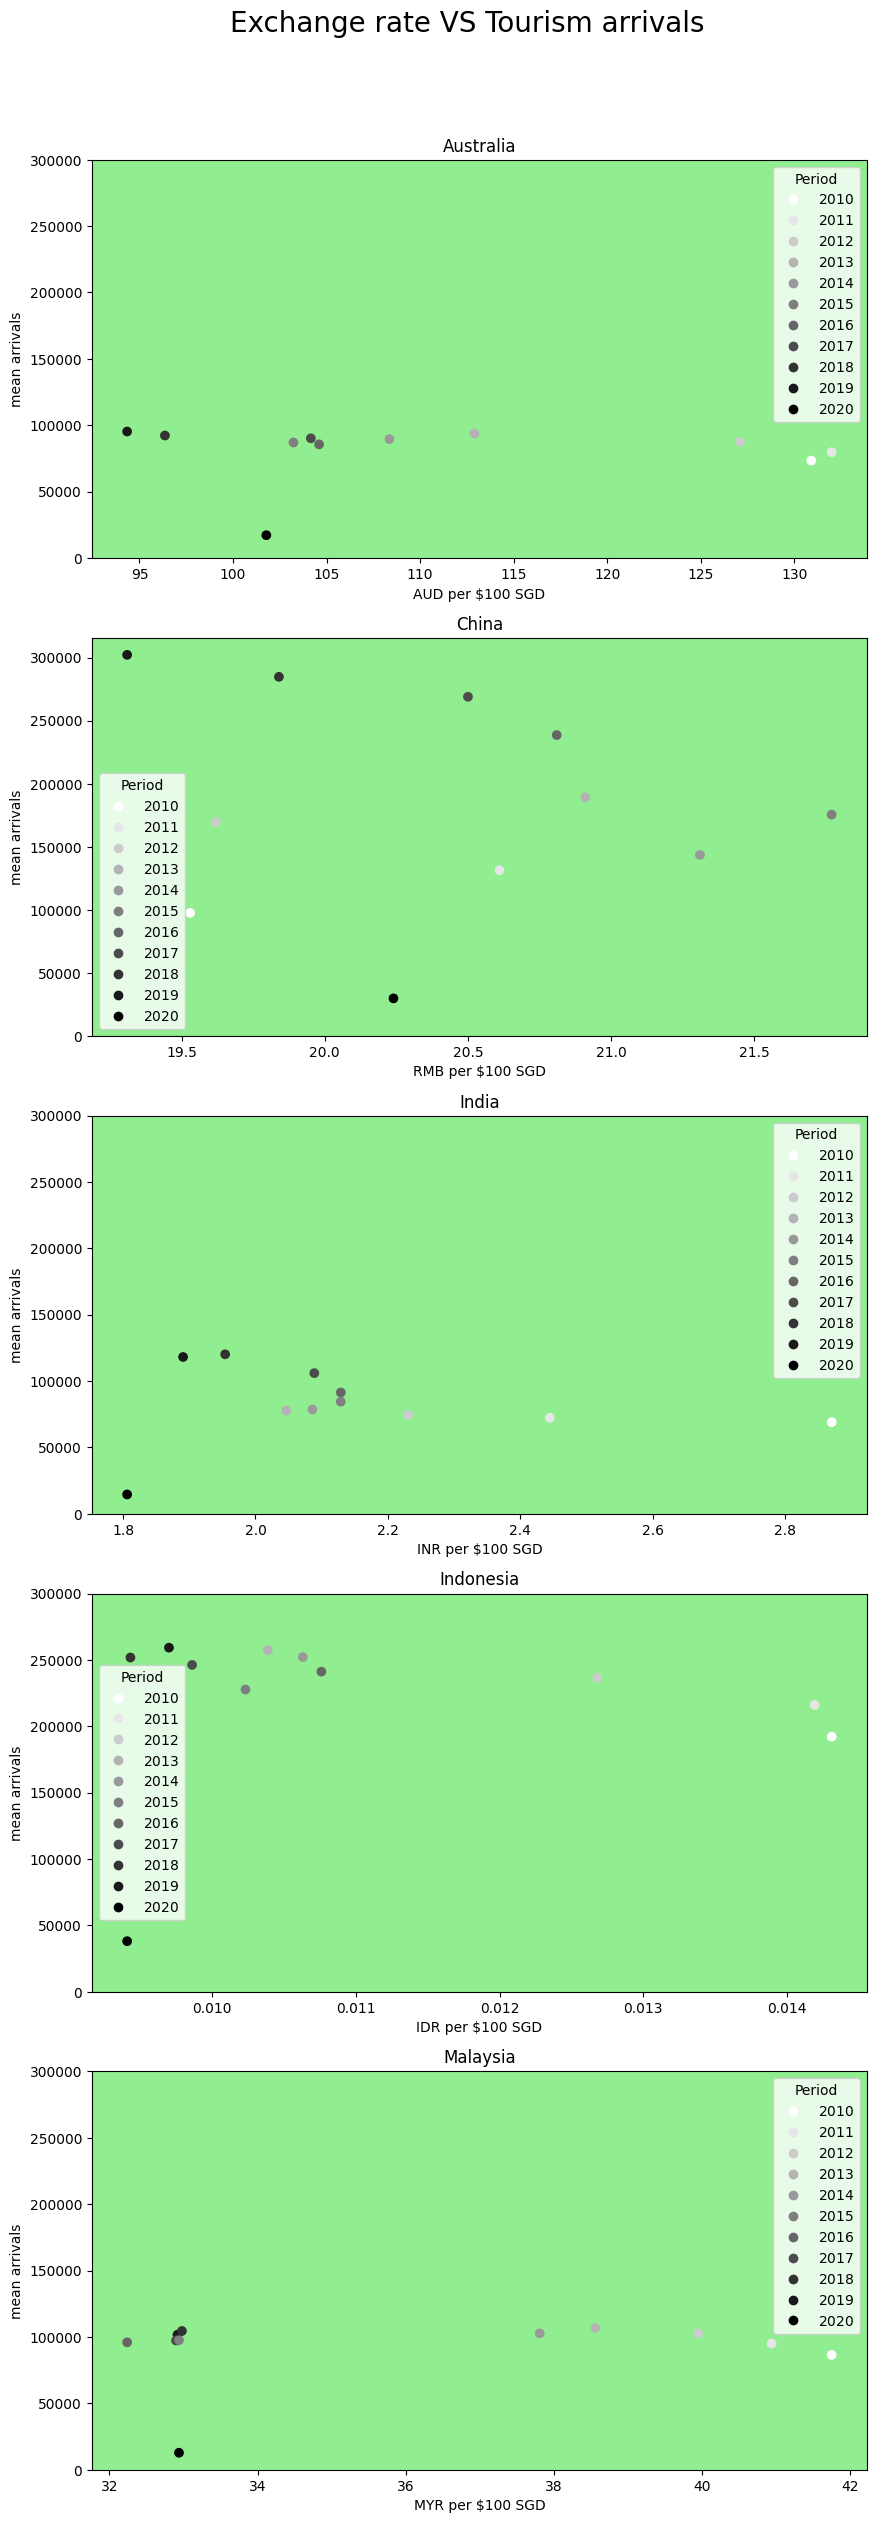

In [541]:
fig_exch,axs_exch=plt.subplots(5,1, figsize=(10,30))
fig_exch.suptitle('Exchange rate VS Tourism arrivals', y=0.93, fontsize= 20)
for i in axs_exch:
    i.set_facecolor('lightgreen')

plt.subplot(5,1,1)
scatplot_exch('AUD','Australia')
axs_exch[0].set_title('Australia')

plt.subplot(5,1,2)
scatplot_exch('RMB','China')
axs_exch[1].set_title('China')

plt.subplot(5,1,3)
scatplot_exch('INR','India')
axs_exch[2].set_title('India')

plt.subplot(5,1,4)
scatplot_exch('IDR','Indonesia')
axs_exch[3].set_title('Indonesia')

plt.subplot(5,1,5)
scatplot_exch('MYR','Malaysia')
axs_exch[4].set_title('Malaysia');

###  3.2.4 Unemployment and tourism arrivals

In [542]:
#Concatenating the data
df_arr_unmply=pd.concat([df_arr_5,df_unmply], axis=1)

In [543]:
#Creating a function to plot a scatterplot between country unemployment rate and arrivals
def scatplot_unmply(country):
    scat=plt.scatter(df_arr_unmply[country+'_u_rate'],df_arr_unmply[country], c=df_arr_unmply.index, cmap='binary')
    plt.xlabel(f"{country}'s unemployment rate")
    plt.ylabel('mean arrivals')
    plt.yticks(ticks=[0,50000,100000,150000,200000,250000,300000])
    plt.legend(*scat.legend_elements(), title="Period")

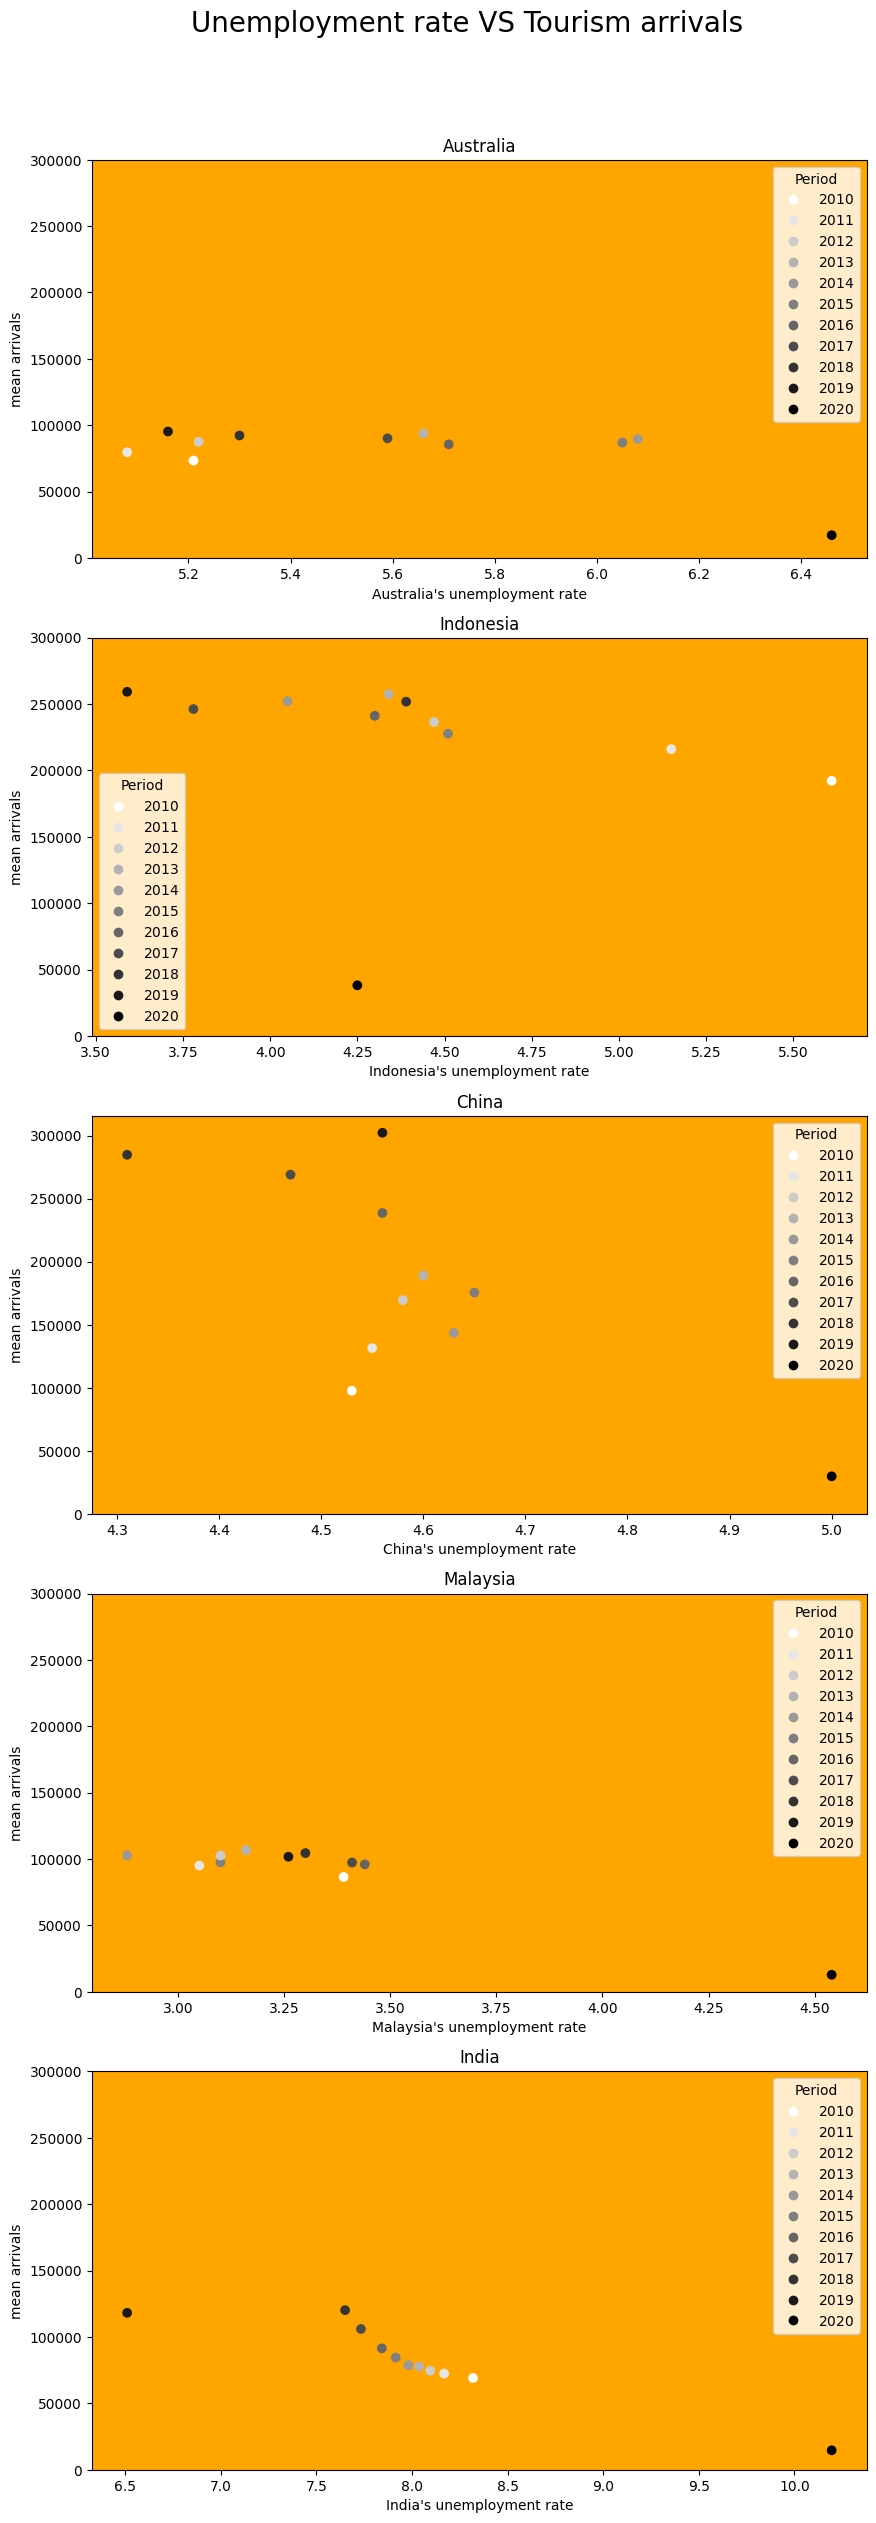

In [544]:
fig_exch,axs_unmply=plt.subplots(5,1, figsize=(10,30))
fig_exch.suptitle('Unemployment rate VS Tourism arrivals', y=0.93, fontsize= 20)
for i in axs_unmply:
    i.set_facecolor('orange')
    
plt.subplot(5,1,1)
scatplot_unmply('Australia')
axs_unmply[0].set_title('Australia')

plt.subplot(5,1,2)
scatplot_unmply('Indonesia')
axs_unmply[1].set_title('Indonesia')

plt.subplot(5,1,3)
scatplot_unmply('China')
axs_unmply[2].set_title('China')

plt.subplot(5,1,4)
scatplot_unmply('Malaysia')
axs_unmply[3].set_title('Malaysia')

plt.subplot(5,1,5)
scatplot_unmply('India')
axs_unmply[4].set_title('India');

Conclusion:
- Most do not show correlaton
- Except for india which seems to have an inverse relationship

###  3.2.5 GNI per capita and tourism arrivals

In [545]:
df_GNI

Period,Malaysia_GNI,China_GNI,Indonesia_GNI,India_GNI,Australia_GNI
2020,26700.0,17050.0,11820.0,6360.0,51870.0
2019,28090.0,16610.0,11980.0,6820.0,50170.0
2018,26620.0,15430.0,11320.0,6520.0,48620.0
2017,25200.0,14220.0,10600.0,6050.0,47090.0
2016,24180.0,13420.0,10150.0,5660.0,46140.0
2015,23510.0,12840.0,9880.0,5350.0,45310.0
2014,23220.0,12500.0,9890.0,5130.0,45660.0
2013,22190.0,11780.0,9710.0,4950.0,44770.0
2012,21700.0,11140.0,9370.0,4770.0,41540.0
2011,20800.0,10200.0,8770.0,4430.0,40330.0


In [546]:
#Concatenating the data
df_arr_GNI=pd.concat([df_arr_5,df_GNI], axis=1)

In [547]:
#Creating a function to plot a scatterplot between country GNI and arrivals
def scatplot_GNI(country):
    scat=plt.scatter(df_arr_GNI[country+'_GNI'],df_arr_GNI[country], c=df_arr_GNI.index, cmap='binary')
    plt.xlabel(f"{country}'s GNI per capita PPP")
    plt.ylabel('mean arrivals')
    plt.yticks(ticks=[0,50000,100000,150000,200000,250000,300000])
    plt.legend(*scat.legend_elements(), title="Period")

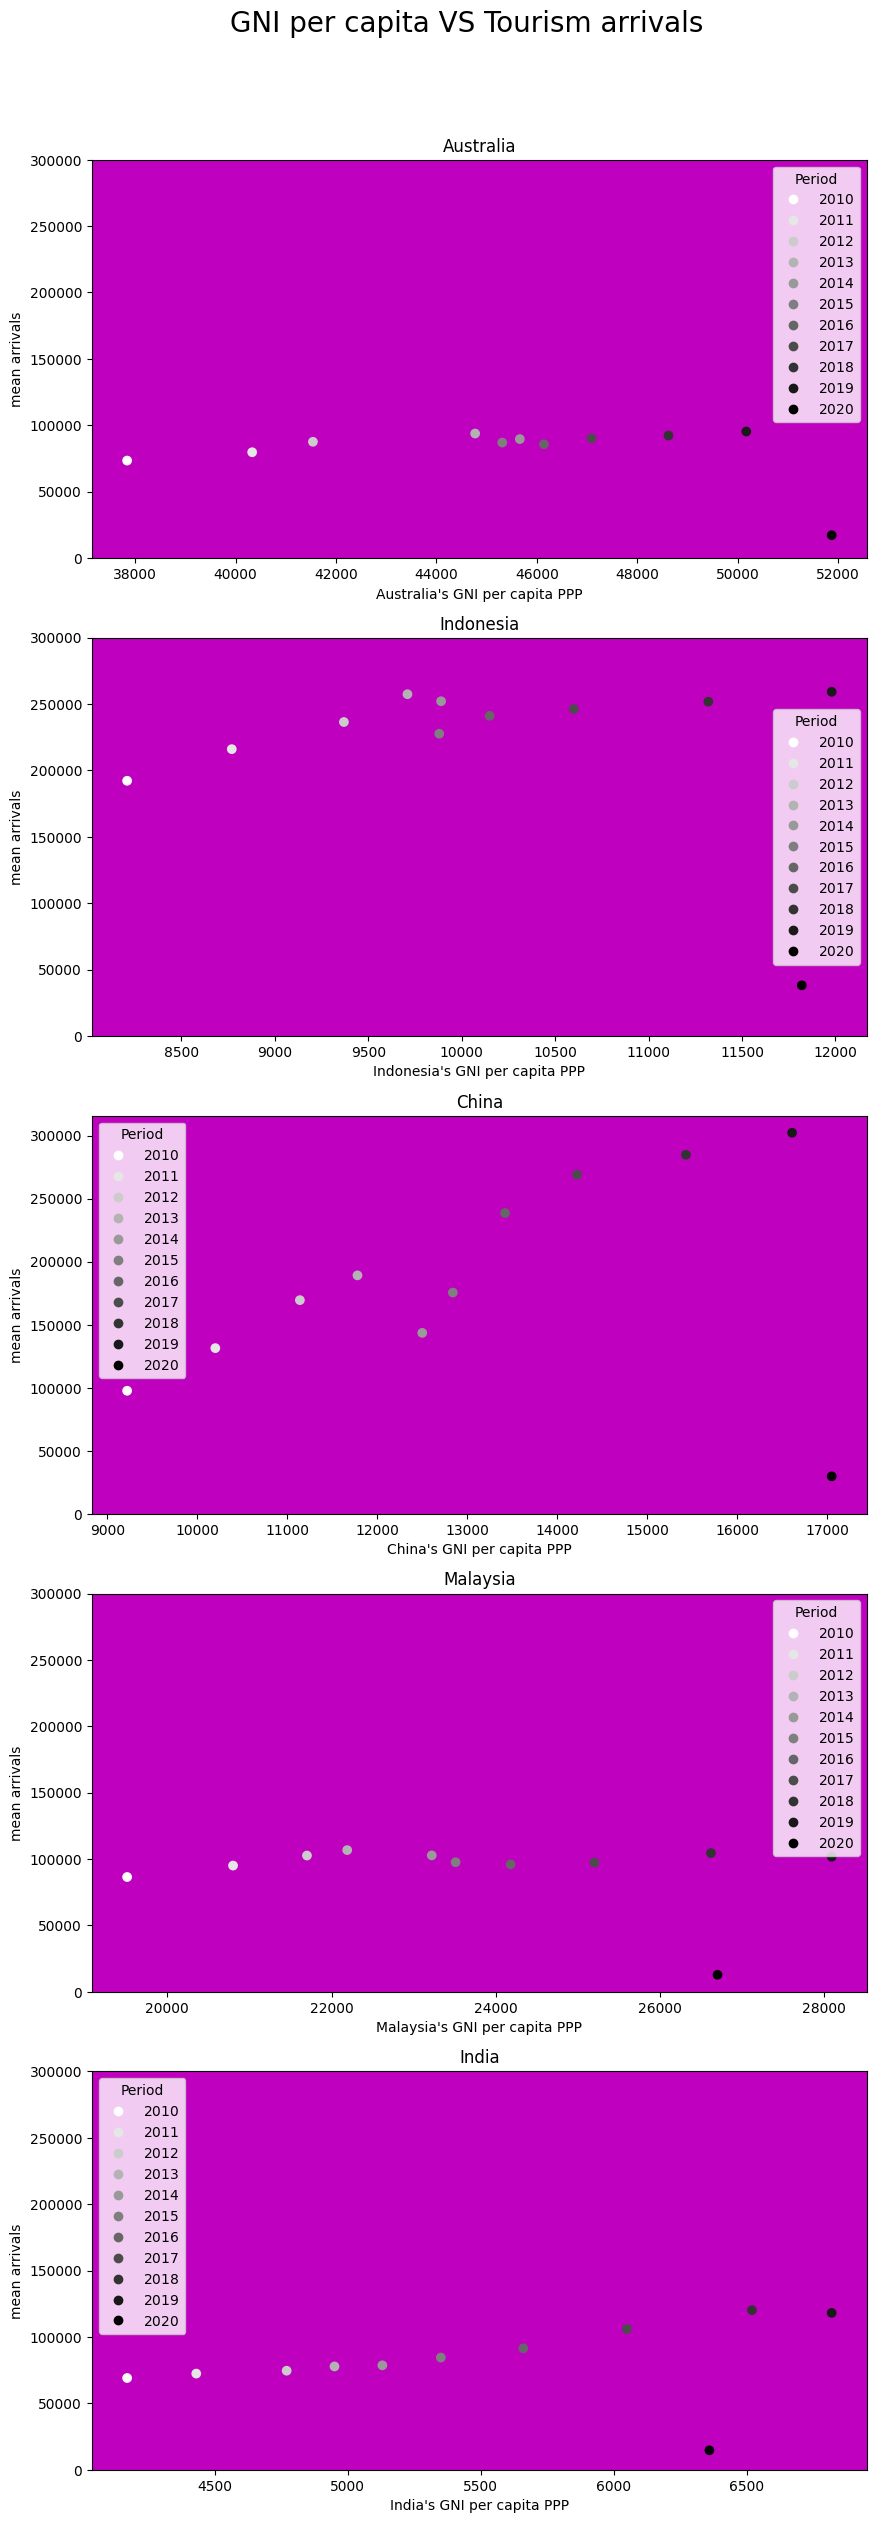

In [548]:
fig_exch,axs_GNI=plt.subplots(5,1, figsize=(10,30))
fig_exch.suptitle('GNI per capita VS Tourism arrivals', y=0.93, fontsize= 20)
for i in axs_GNI:
    i.set_facecolor('m')
    
plt.subplot(5,1,1)
scatplot_GNI('Australia')
axs_GNI[0].set_title('Australia')

plt.subplot(5,1,2)
scatplot_GNI('Indonesia')
axs_GNI[1].set_title('Indonesia')

plt.subplot(5,1,3)
scatplot_GNI('China')
axs_GNI[2].set_title('China')

plt.subplot(5,1,4)
scatplot_GNI('Malaysia')
axs_GNI[3].set_title('Malaysia')

plt.subplot(5,1,5)
scatplot_GNI('India')
axs_GNI[4].set_title('India');

Conclusion:
-Expected positive relationship which most countries show some indications especially for China 

##  3.3 Overall analysis 

### 3.3.1 Functions created for the analysis

In [549]:
#Creating a function to plot distribution on climate data

df_SGpcp_10_17=df_SG_mean_rainfall[df_SG_mean_rainfall['Year'].between(2010,2017)]
df_SGtemp_10_17=df_SG_mean_temp[df_SG_mean_temp['Year'].between(2010,2017)]

def dist_plot(data_pcp,data_temp,country,df_SGpcp_10_17=df_SGpcp_10_17):
    fig,axs=plt.subplots(2,2, figsize=(15,10))

    ax00=axs[0,0]
    n00,bins00,patches00=ax00.hist(data_pcp[country])
    ax00.set_xlabel('Rainfall in mm')
    ax00.set_ylabel('Frequency')
    ax00.set_title(f'{country} mean rainfall distribution')
    ax00.vlines(x=np.mean([np.min(data_pcp[country]),np.max(data_pcp[country])]),ymin=0,ymax=max(n00), color='orange')

    ax01=axs[0,1]
    n01,bins01,patches01=ax01.hist(data_temp[country])
    ax01.set_xlabel('Temperature in degrees celsius')
    ax01.set_ylabel('Frequency')
    ax01.set_title(f'{country} mean temperature distribution')
    ax01.vlines(x=np.mean([np.min(data_temp[country]),np.max(data_temp[country])]),ymin=0,ymax=max(n01), color='orange')

    ax10=axs[1,0]
    n10,bins10,patches10=ax10.hist(df_SGpcp_10_17['total_rainfall'])
    ax10.set_xlabel('Rainfall in mm')
    ax10.set_ylabel('Frequency')
    ax10.set_title('SG mean rainfall distribution')
    ax10.vlines(x=np.mean([np.min(df_SGpcp_10_17['total_rainfall']),np.max(df_SGpcp_10_17['total_rainfall'])]),ymin=0,ymax=max(n10), color='orange')

    ax11=axs[1,1]
    n11,bins11,patches11=ax11.hist(df_SGtemp_10_17['mean_temperature'])
    ax11.set_xlabel('Temperature in degrees celsius')
    ax11.set_ylabel('Frequency')
    ax11.set_title('SG mean temperautre distribution')
    ax11.vlines(x=np.mean([np.min(df_SGtemp_10_17['mean_temperature']),np.max(df_SGtemp_10_17['mean_temperature'])]),ymin=0,ymax=max(n11), color='orange');



In [550]:
#Creating a function to plot the distribution on exchange rate data
def exch_dist(currency):
    g=sns.displot(df_exch[currency],kde=True)
    g.set(xlabel=f"{currency} per 100 SGD", ylabel='Frequency',title=f"Distribution of {currency}/SGD from 2010 to 2020")


In [551]:
#Creating a function to plot the distribution of unemployment and GNI data
def unmply_dist(country):
    g=sns.displot(df_unmply[f'{country}_u_rate'],kde=True)
    g.set(xlabel=f"{country}'s unemployment rate", ylabel='Frequency',title=f"Distribution of {country}'s unemployment rate from 2010 to 2020")
    
def GNI_dist(country):
    g=sns.displot(df_GNI[f'{country}_GNI'],kde=True)
    g.set(xlabel=f'{country} GNI per capita', ylabel='Frequency',title=f"Distribution of {country}'s GNI per capita from 2010 to 2020")

In [552]:
#Creating functions to be use in merging function
def arr_temp(country):
    df_name = f"{country}_arr_temp"
    df = eval(df_name)
    return df
def arr_pcp(country):
    df_name = f"{country}_arr_pcp"
    df = eval(df_name)
    return df

#Creating a function for merging
def merge_df(country,currency):
    df1=pd.merge(arr_temp(country),arr_pcp(country), how='inner', on='mean arrivals', suffixes=('_temp','_pcp'))
    df2=df1.merge(df_arr_exch[[country,currency]], left_on='mean arrivals', right_on=country)
    df2.drop(columns=[country],axis=1, inplace=True)
    df3=df2.merge(df_arr_unmply[[country,country+'_u_rate']], left_on='mean arrivals', right_on=country)
    df3.drop(columns=[country],axis=1, inplace=True)
    df4=df3.merge(df_arr_GNI[[country,country+'_GNI']], left_on='mean arrivals', right_on=country)
    df4.drop(columns=[country],axis=1, inplace=True)
    return df4

In [553]:
#Creating a function to visualize correlation based on heatmap with mask
def heatmap_corr(data):
    mask = np.zeros_like(data.corr())
    mask[np.triu_indices_from(mask)] = True

    sns.heatmap(data.corr(),mask=mask,annot=True, cmap='coolwarm',vmin=-1,vmax=1)

### 3.3.2 Australia

#### 3.3.2.1 Distribution of datasets

In [554]:
#Distributions of SG and Australia climate data
df_SGpcp_10_17=df_SG_mean_rainfall[df_SG_mean_rainfall['Year'].between(2010,2017)]
df_SGtemp_10_17=df_SG_mean_temp[df_SG_mean_temp['Year'].between(2010,2017)]

#Filtering Australia's climate data from 2010 to 2017
df_Austemp_10_17=df_Aus_temp.loc[2010:2017][['Australia']]
df_Auspcp_10_17=df_Aus_pcp.loc[2010:2017][['Australia']]

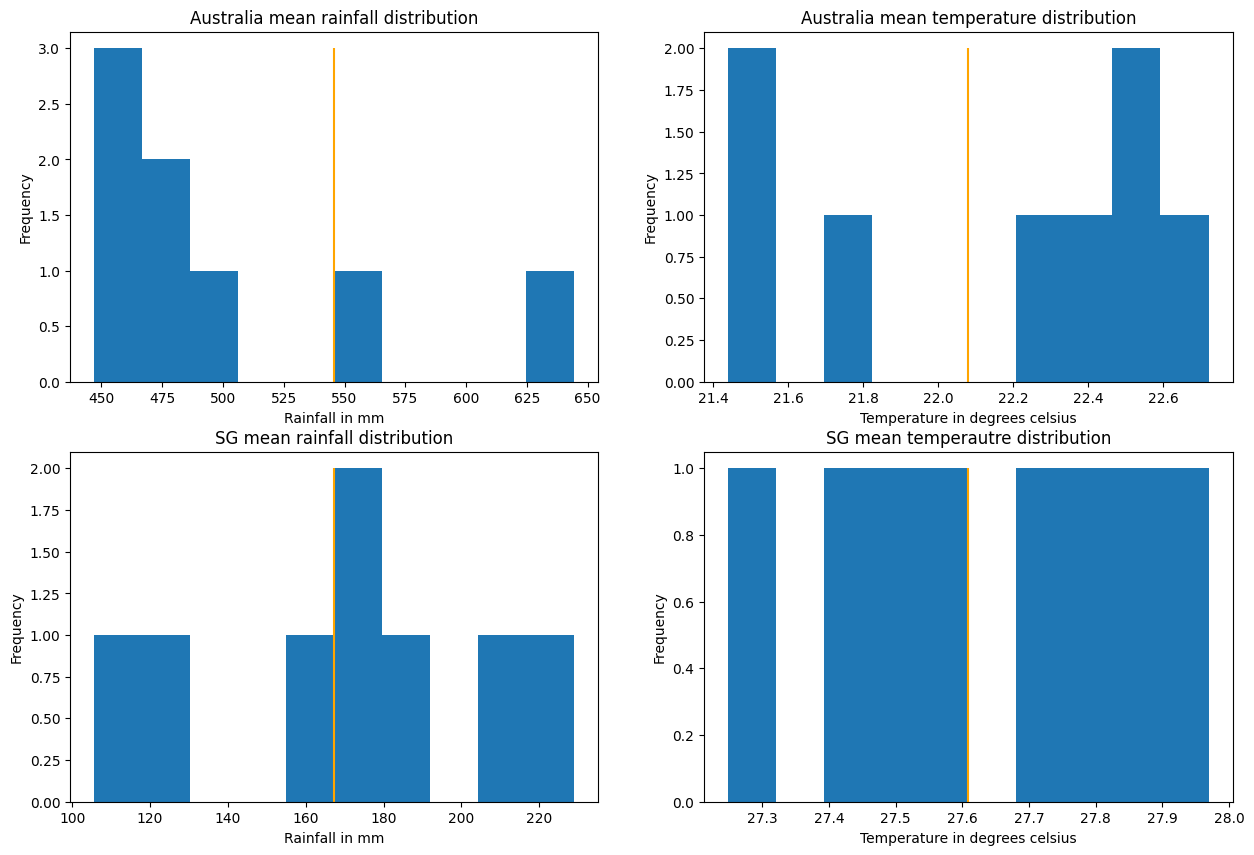

In [555]:
#Visualizing the distribution of SG & Australia's climate data between 2010 to 2017
dist_plot(df_Auspcp_10_17,df_Austemp_10_17,'Australia')

Sample size taken are too small(period of 8 years) to understand the likelihood of distribution of the data thus we have a look at the complete data set to understand better (except for Singapore's mean temperature due to limited data collected)

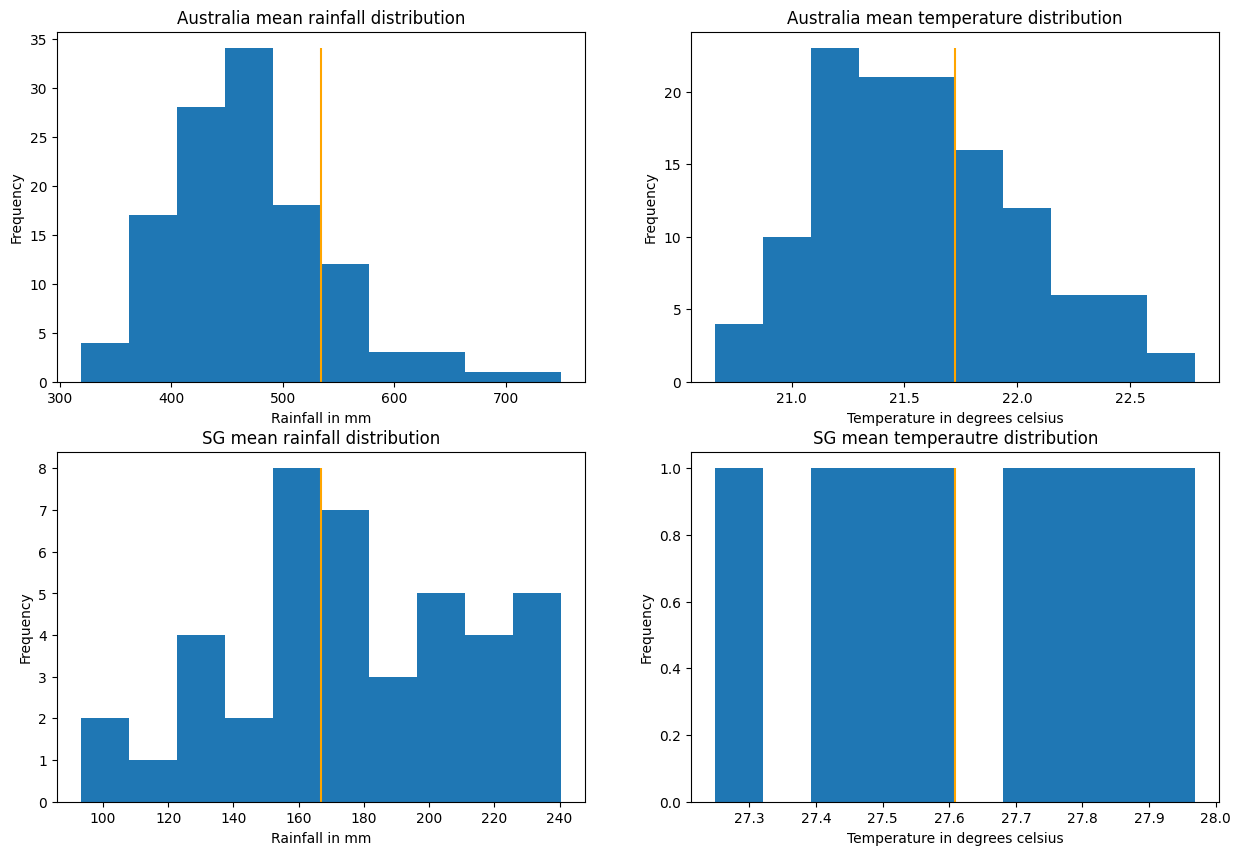

In [556]:
#Visualizing the distribution of overall SG & Australia's climate data
dist_plot(df_Aus_pcp,df_Aus_temp,'Australia',df_SG_mean_rainfall)

Based on the larger sample size, it seems that the Australian overall mean rainfall and temperature is right skewed and Singapore's overall mean rainfall seems to be relatively zero skewed.

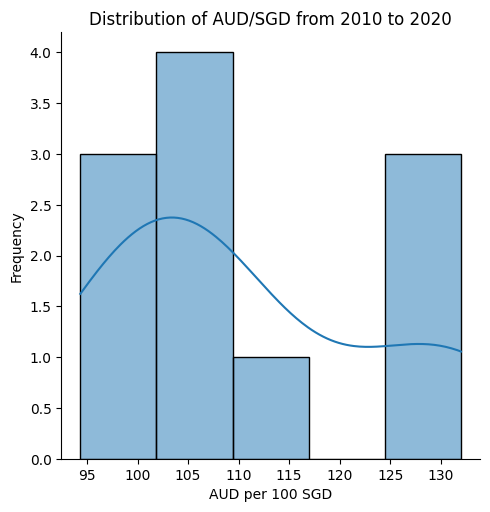

In [557]:
#Distributions of Australia exchange rate data
exch_dist('AUD')

Distribution of AUD prices in this period are left skewed 

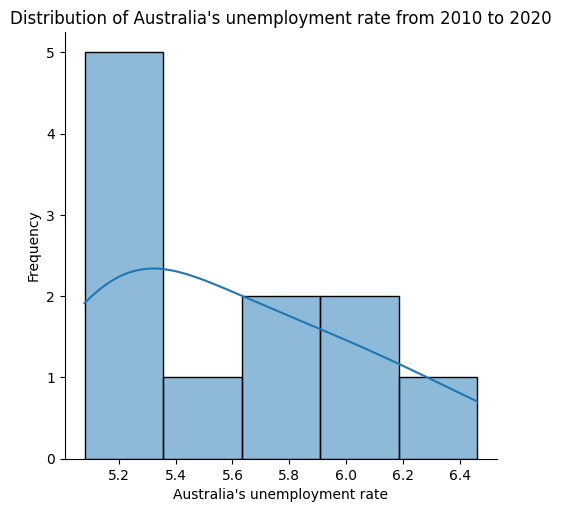

In [558]:
#Distribution of Australia unemployment data
unmply_dist('Australia')

Australia's unemployment rate is left skewed

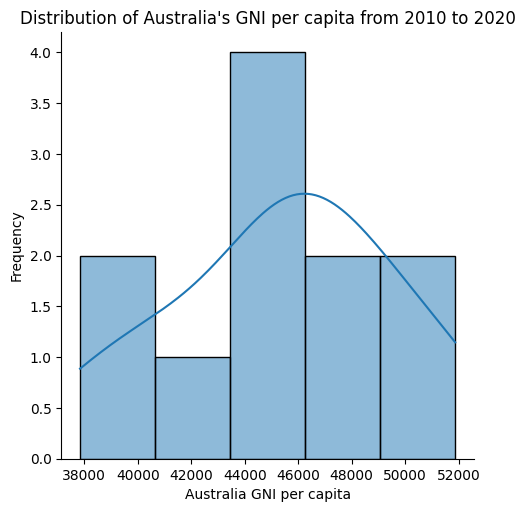

In [559]:
#Distribution of Australia's GNI per capita data
GNI_dist('Australia')

Australia GNI per capita are relatively zero skewed thus indicating that the mean does provide a relevant gauge.

#### 3.3.2.2 Correlation between investigated factors

In [560]:
#Merging dataframes based on countries
df_Australia=merge_df('Australia','AUD')

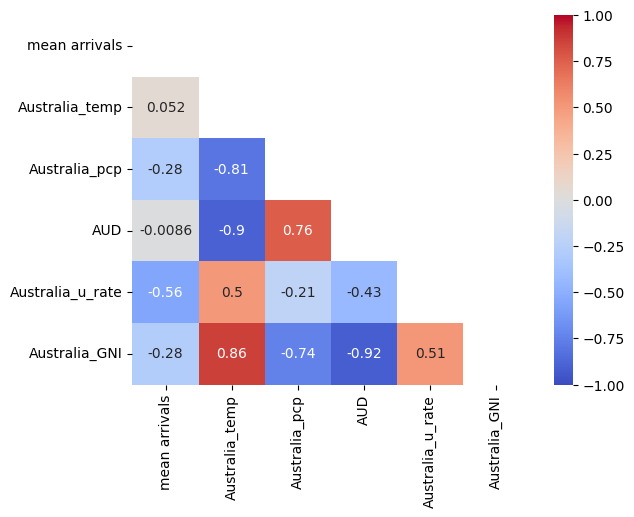

In [561]:
#Investigating the correlation between all factors

#Visualising the correlation with heatmap
heatmap_corr(df_Australia)

Weak to no correlation between climate and tourism arrivals from Australia
- r=0.052 between Australia's average temperature and mean number of tourist arrivals from Australia 
- r=-0.28 between Australia's average rainfall and mean number of tourist arrivals from Australia

Mostly weak to no correlation between economical factors and tourism arrivals from Australia
- r=-0.0086 between AUD price and mean number of Australian tourist arrivals
- r=-0.56 between Australian unemployment rate and tourist arrivals
    - Would have expected stronger negative relationship but it still suggest a relatively significant negative relationship
- r=-0.28 between Australia's GNI per capita and tourist arrivals

Other obeservations:
- Australia's GNI per capita have strong relationship with Australia's mean temperature as well as the price of AUD and average rainfall which is unusal
- Strong inverse relationship between AUD and Australia's GNI with r=-0.92

In [562]:
#Correlation between the 2 countries climate
#Formating SG climate data for merging
df_SGpcp_10_17.set_index('Year',drop=True, inplace=True)
df_SGtemp_10_17.set_index('Year',drop=True, inplace=True)

#Merging SG and Australia climate datasets to investigate correlation
df_SG=df_SGpcp_10_17.merge(df_SGtemp_10_17,left_index=True, right_index=True)
df_Aus=df_Auspcp_10_17.merge(df_Austemp_10_17,left_index=True, right_index=True,suffixes=['_pcp','_temp'])
df_compare_SG_Aus=df_SG.merge(df_Aus, left_index=True, right_index=True)

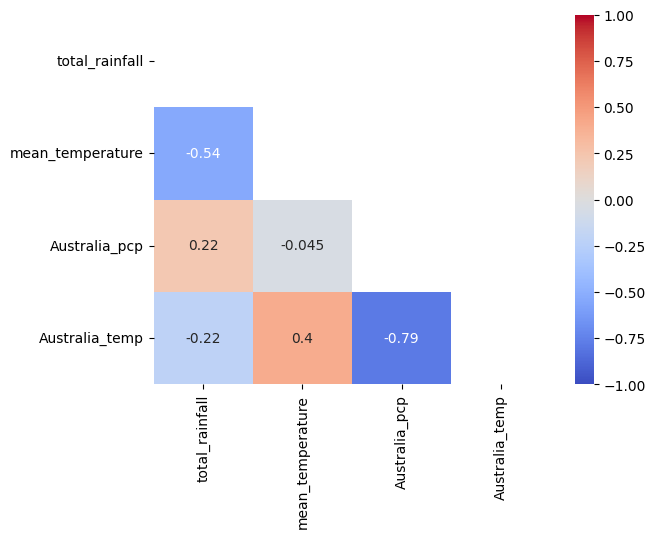

In [563]:
#Visualizing correlation between the country's climate
heatmap_corr(df_compare_SG_Aus)

- There are no significance in the correlation between SG and Australia's climate
    - Weak correlation between SG and Australia temperature (r=0.4) suggesting that the temperature in the 2 countries might often varies
    - Weak correlation between SG and Australia precipitation (r=0.22) suggesting that the precipitation in the 2 countries might also varies
- Australia's temperature and precipitation display strong negative correlation (r=-0.79) suggesting frequent rainfall lowers the temperature in Australia which Singapore's data also suggest similar relationship but not as strongly (r=-0.54) 

Conclusion:
- Singapore's climate seems to not be a significant factor in influencing Australia tourist arrivals since it indicates weak correlation despite the weather varies in this 2 countries
- It is more likely that economical factors influence Australia tourist arrivals especially the unemployment rate which suggest an inverse relationship

### 3.3.3 Indonesia

#### 3.3.3.1 Distribution of datasets

In [564]:
#Filtering Indonesia's climate data from 2010 to 2017
df_Indontemp_10_17=df_Indon_temp.loc[2010:2017][['Indonesia']]
df_Indonpcp_10_17=df_Indon_pcp.loc[2010:2017][['Indonesia']]

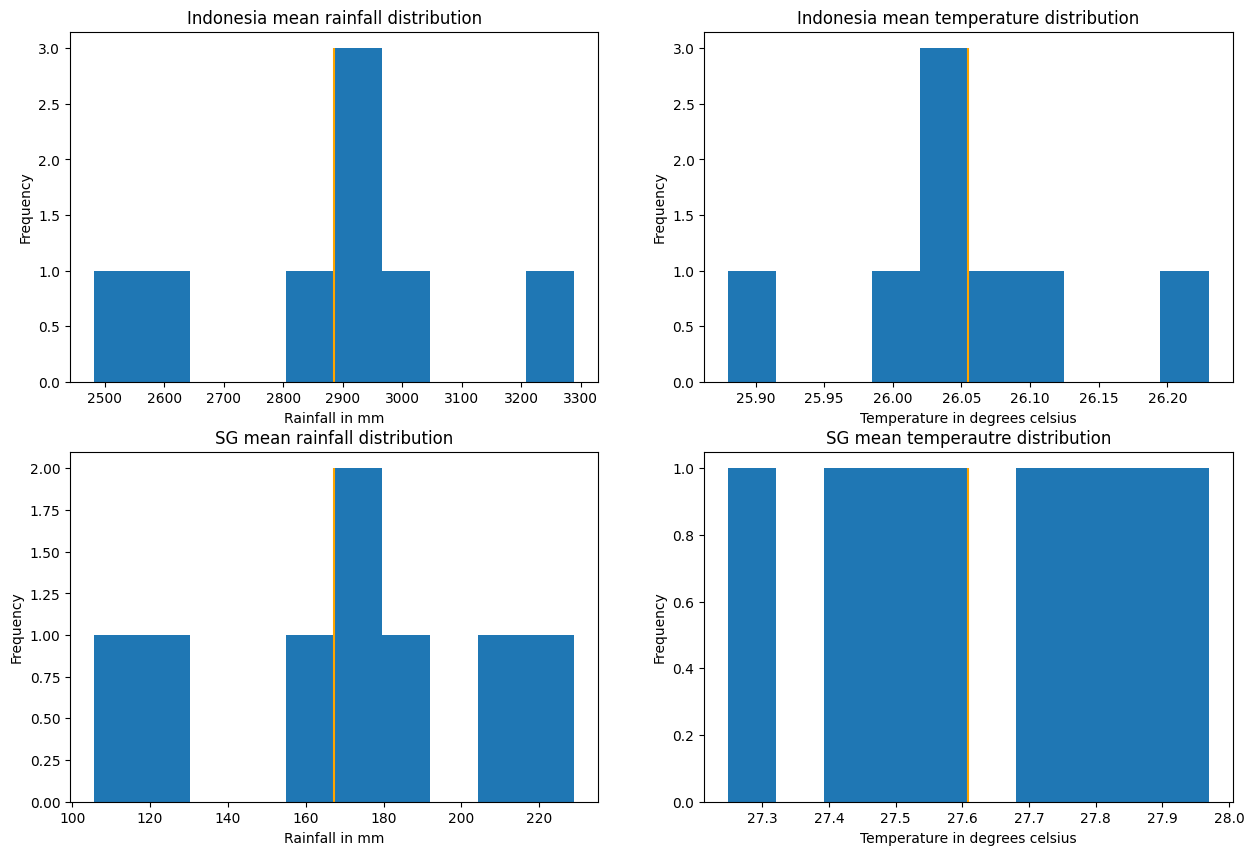

In [565]:
#Visualizing the distribution of SG & Indonesia's climate data
dist_plot(df_Indonpcp_10_17,df_Indontemp_10_17,'Indonesia')

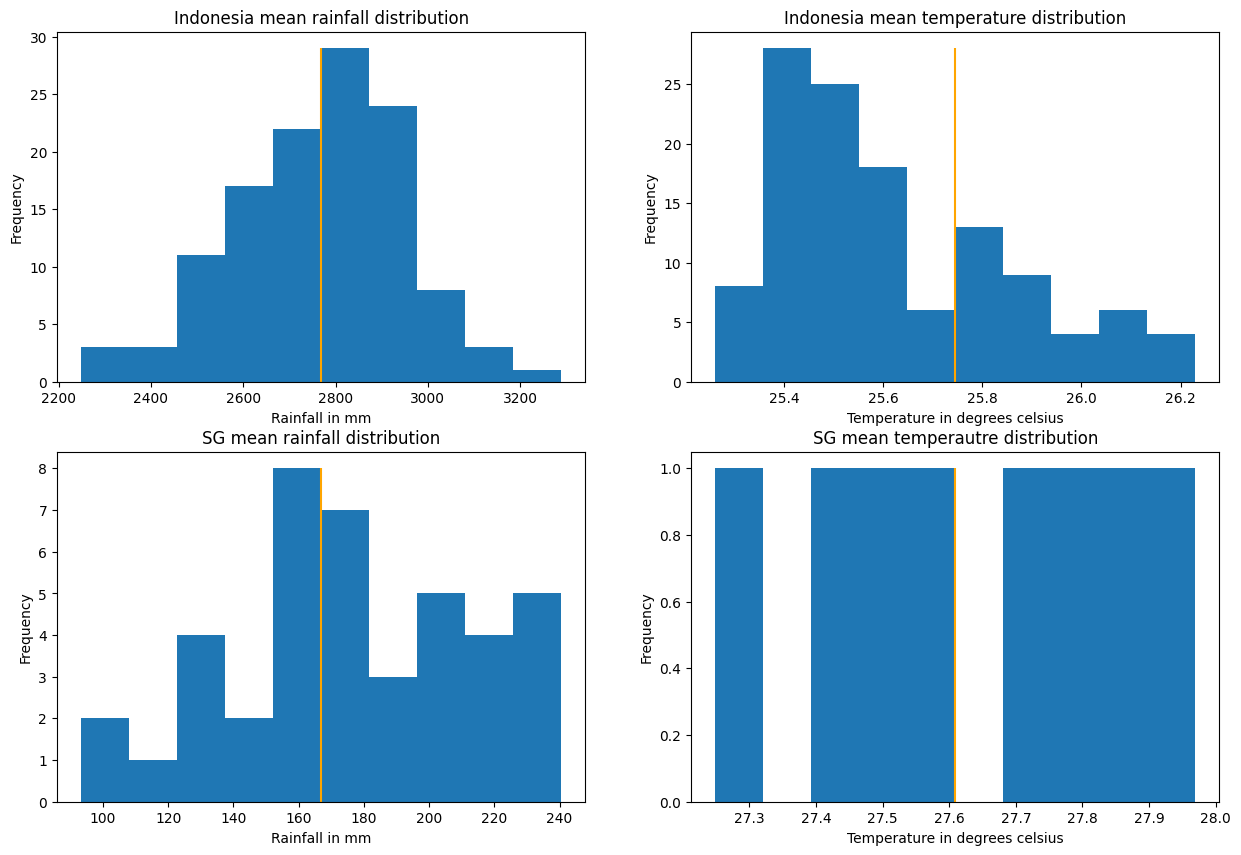

In [566]:
#Visualizing the distribution of overall SG & Indonesia's climate data
dist_plot(df_Indon_pcp,df_Indon_temp,'Indonesia',df_SG_mean_rainfall)

Data sets between 2010 to 2017 seems to be relatively zero skewed

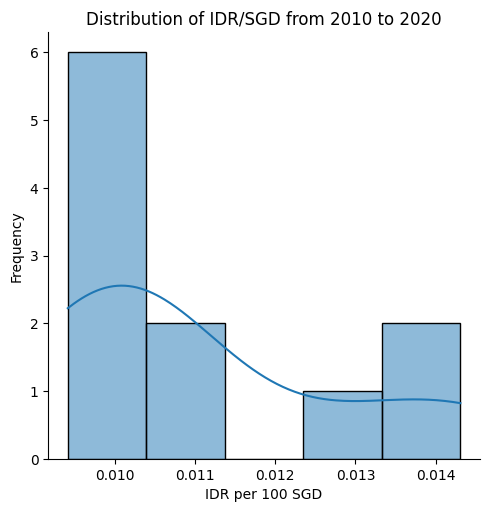

In [567]:
#Distributions of Indonesia exchange rate data
exch_dist('IDR')

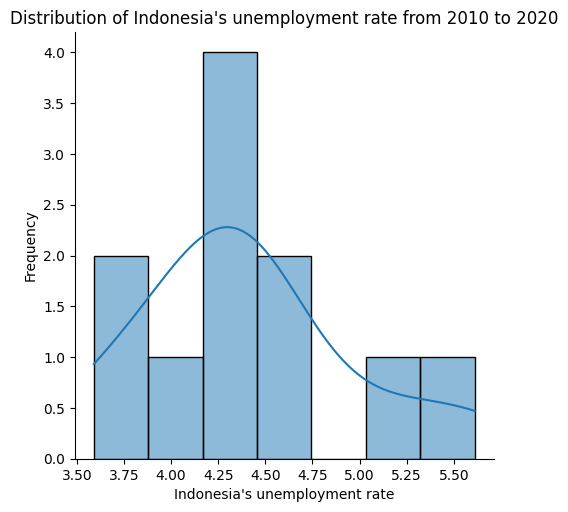

In [568]:
#Distribution of Indonesia unemployment data
unmply_dist('Indonesia')

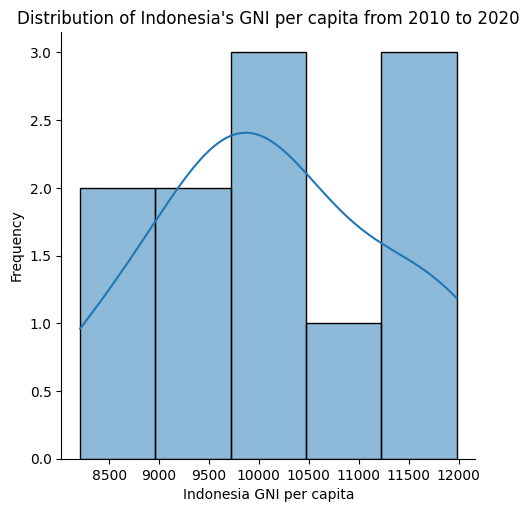

In [569]:
#Distribution of Indonesia's GNI per capita data
GNI_dist('Indonesia')

#### 3.3.3.2 Correlation between investigated factors

In [570]:
#Merging dataframes based on countries
df_Indonesia=merge_df('Indonesia','IDR')

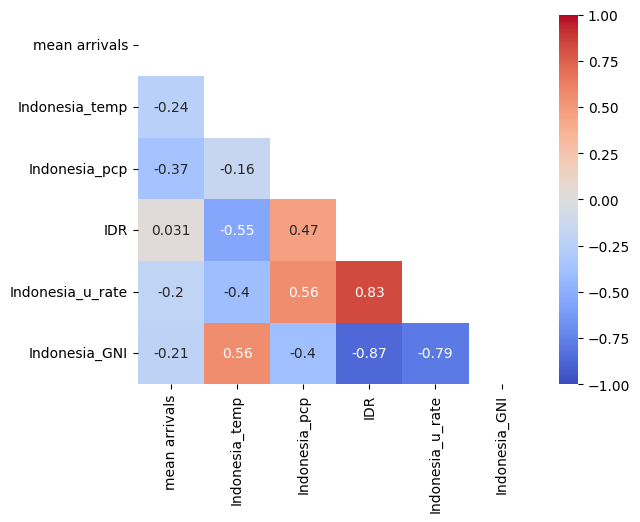

In [571]:
#Investigating the correlation between all factors

#Visualising the correlation with heatmap
heatmap_corr(df_Indonesia)

- Weak inverse correlation between climate and tourist arrivals
    - Mean temperature and precipitation in Indonesia have a correlation coefficient of -0.24 and -0.37 respectively

- Weak to no inverse correlation between economic factors and tourist arrivals
    - Indian currency have correlation coefficient of 0.031
    - Both unemployment rate and GNI are weakly inverse related with correlation coefficient of -0.2 and -0.21 respectively



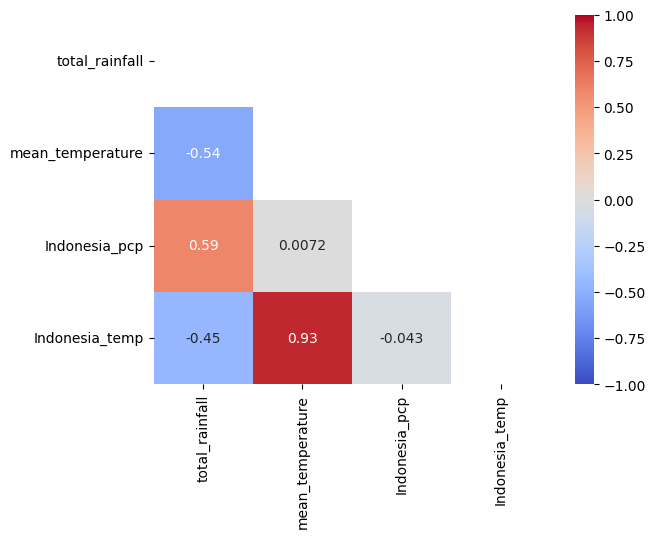

In [572]:
#Correlation between the 2 countries climate

#Merging SG and Indonesia climate datasets to investigate correlation
df_Indon=df_Indonpcp_10_17.merge(df_Indontemp_10_17,left_index=True, right_index=True,suffixes=['_pcp','_temp'])
df_compare_SG_Indon=df_SG.merge(df_Indon, left_index=True, right_index=True)

#Visualizing correlation between the country's climate
heatmap_corr(df_compare_SG_Indon)

- Strong correlation between SG and Indonesia's mean temperature and weak correlation to the country's precipitation suggesting similar change to weather patterns between the 2 countries which might explain why climate might not have correlation to tourist arrivals 

### 3.3.4 China

#### 3.3.4.1 Distribution of datasets

In [573]:
#Filtering China's climate data from 2010 to 2017
df_Chinatemp_10_17=df_China_temp.loc[2010:2017][['China']]
df_Chinapcp_10_17=df_China_pcp.loc[2010:2017][['China']]

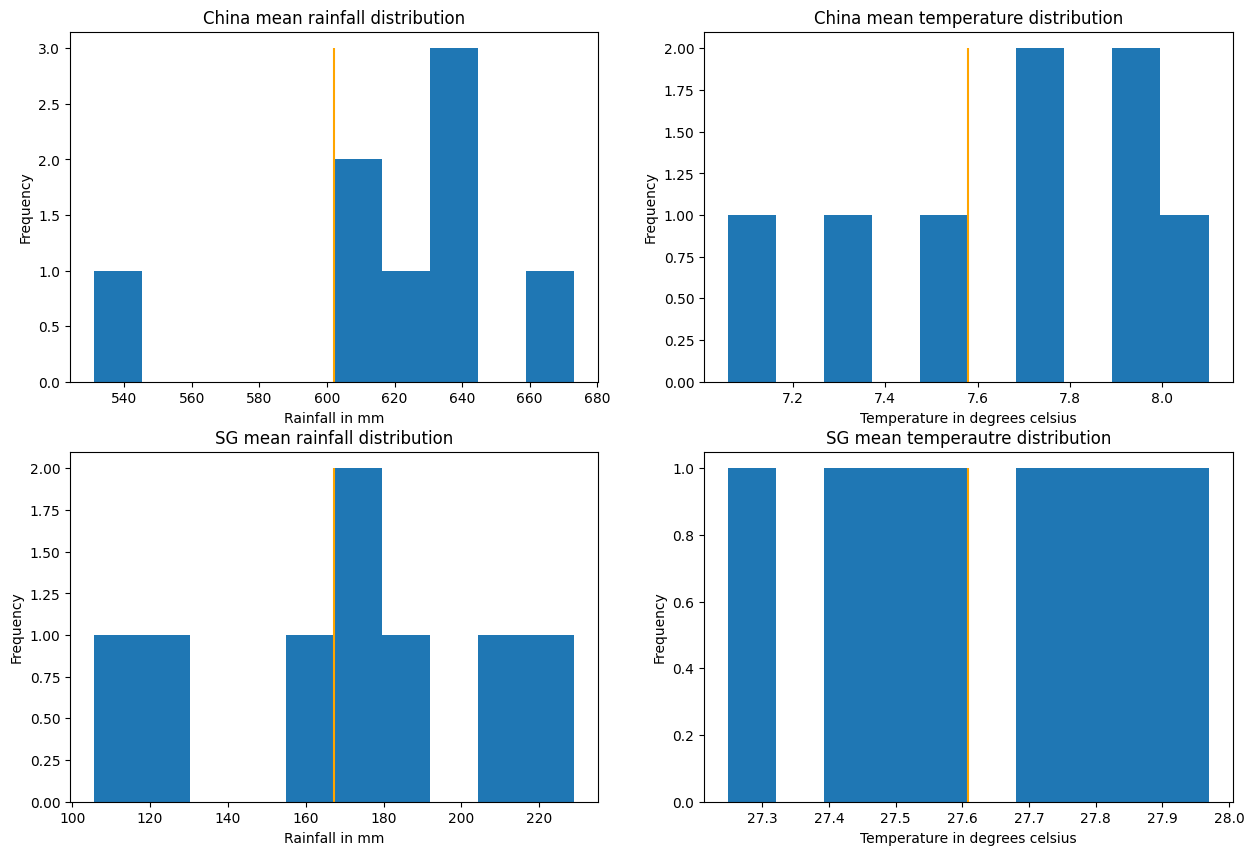

In [574]:
#Visualizing the distribution of SG & China's climate data between 2010 to 2017
dist_plot(df_Chinapcp_10_17,df_Chinatemp_10_17,'China')

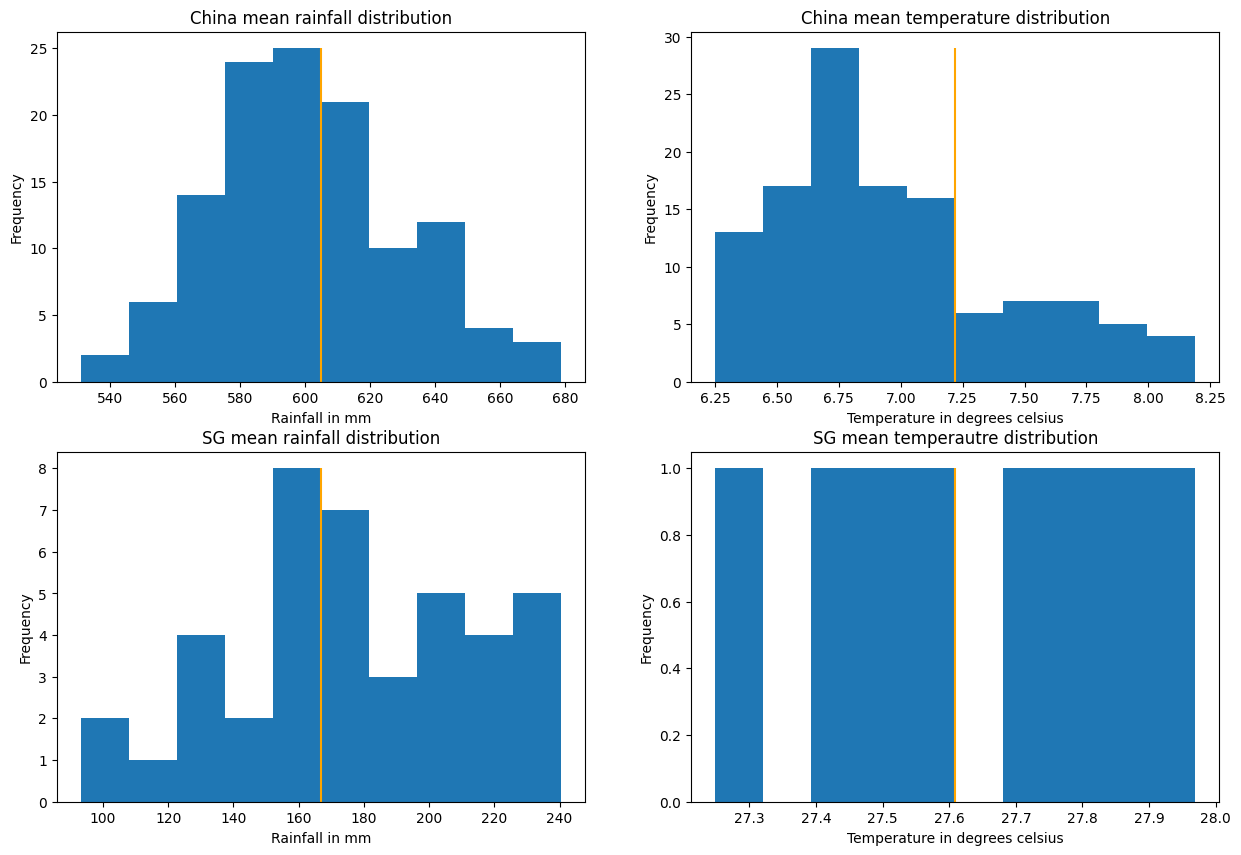

In [575]:
#Visualizing the distribution of overall SG & China's climate data
dist_plot(df_China_pcp,df_China_temp,'China',df_SG_mean_rainfall)

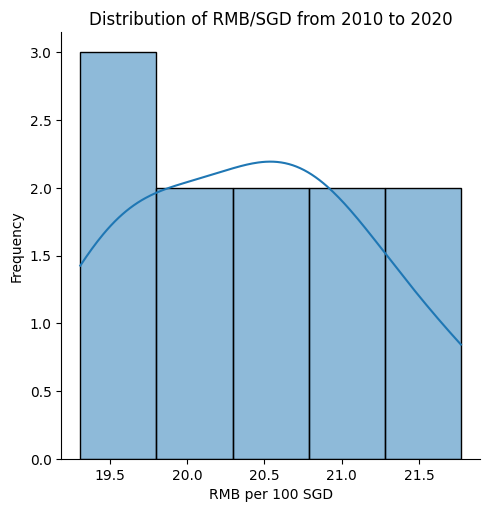

In [576]:
#Distributions of China exchange rate data
exch_dist('RMB')

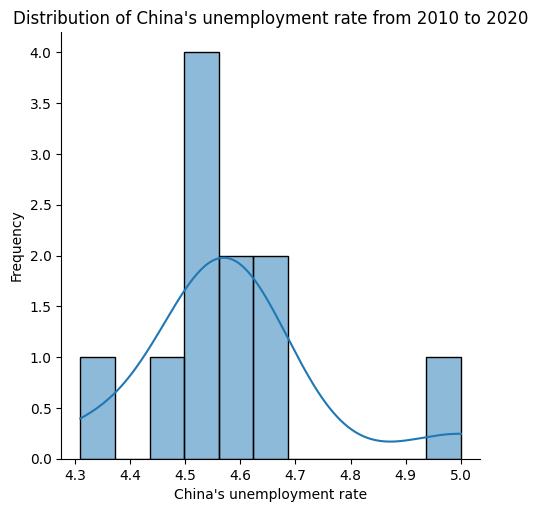

In [577]:
#Distribution of China unemployment data
unmply_dist('China')

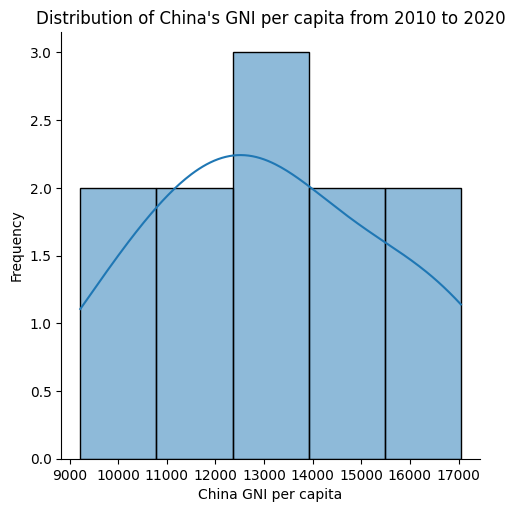

In [578]:
#Distribution of China's GNI per capita data
GNI_dist('China')

#### 3.3.4.2 Correlation between investigated factors

In [579]:
#Merging dataframes based on countries
df_China=merge_df('China','RMB')

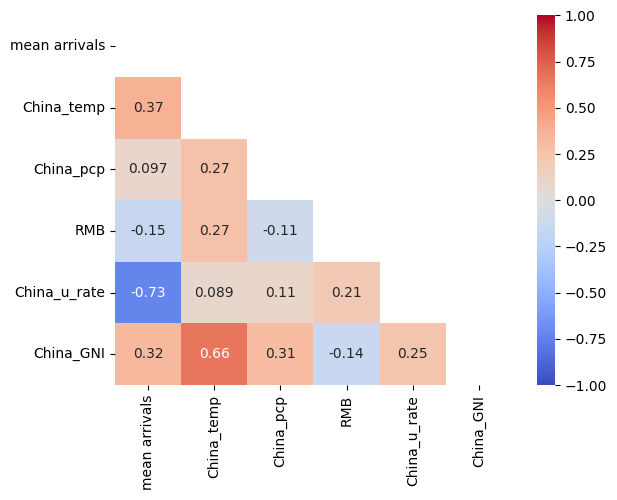

In [580]:
#Investigating the correlation between all factors

#Visualising the correlation with heatmap
heatmap_corr(df_China)

- Weak positive correlation between climate and tourist arrivals with r=0.37 and r=0.097 for mean temperature and precipitation respectively
- Strong inverse correlation between China's unemployment rate and tourist arrival, r=-0.73 but other economic factors are weakly related with r=-0.15 and r=0.32 for exchange rate and GNI respectively

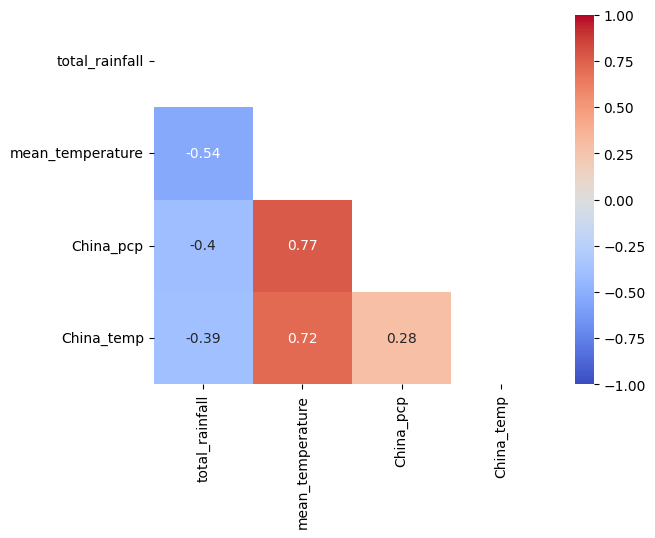

In [581]:
#Correlation between the 2 countries climate

#Merging SG and China climate datasets to investigate correlation
df_China=df_Chinapcp_10_17.merge(df_Chinatemp_10_17,left_index=True, right_index=True,suffixes=['_pcp','_temp'])
df_compare_SG_China=df_SG.merge(df_China, left_index=True, right_index=True)

#Visualizing correlation between the country's climate
heatmap_corr(df_compare_SG_China)

-Strong relation between country's temperature but less so for precipitation. However since China's climate data is drawn based on the average among the numerous states where climate conditions can varies, correlation results might not be meaningful

### 3.3.5 Malaysia

#### 3.3.5.1 Distribution of datasets

In [582]:
#Filtering Malaysia's climate data from 2010 to 2017
df_Malaysiatemp_10_17=df_My_temp.loc[2010:2017][['Malaysia']]
df_Malaysiapcp_10_17=df_My_pcp.loc[2010:2017][['Malaysia']]

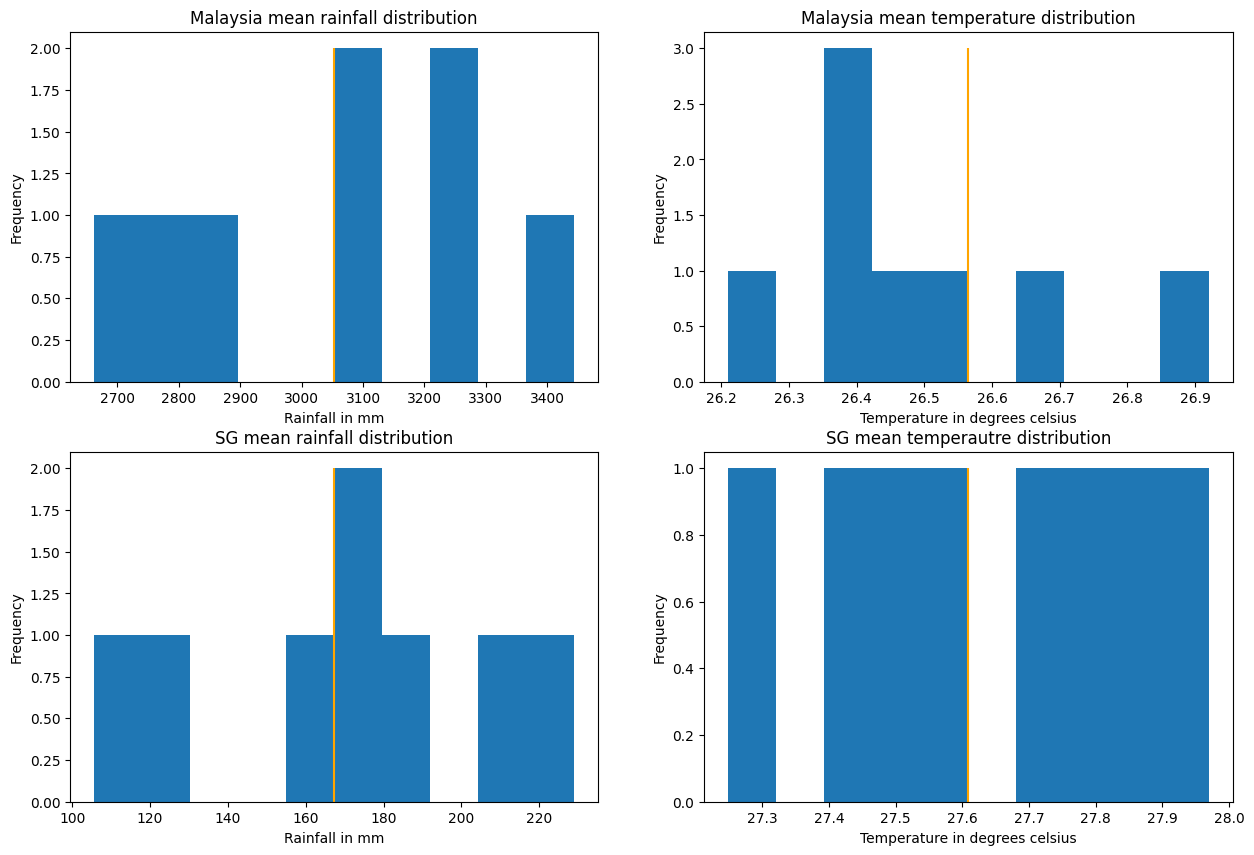

In [583]:
#Visualizing the distribution of SG & Malaysia's climate data between 2010 to 2017
dist_plot(df_Malaysiapcp_10_17,df_Malaysiatemp_10_17,'Malaysia')

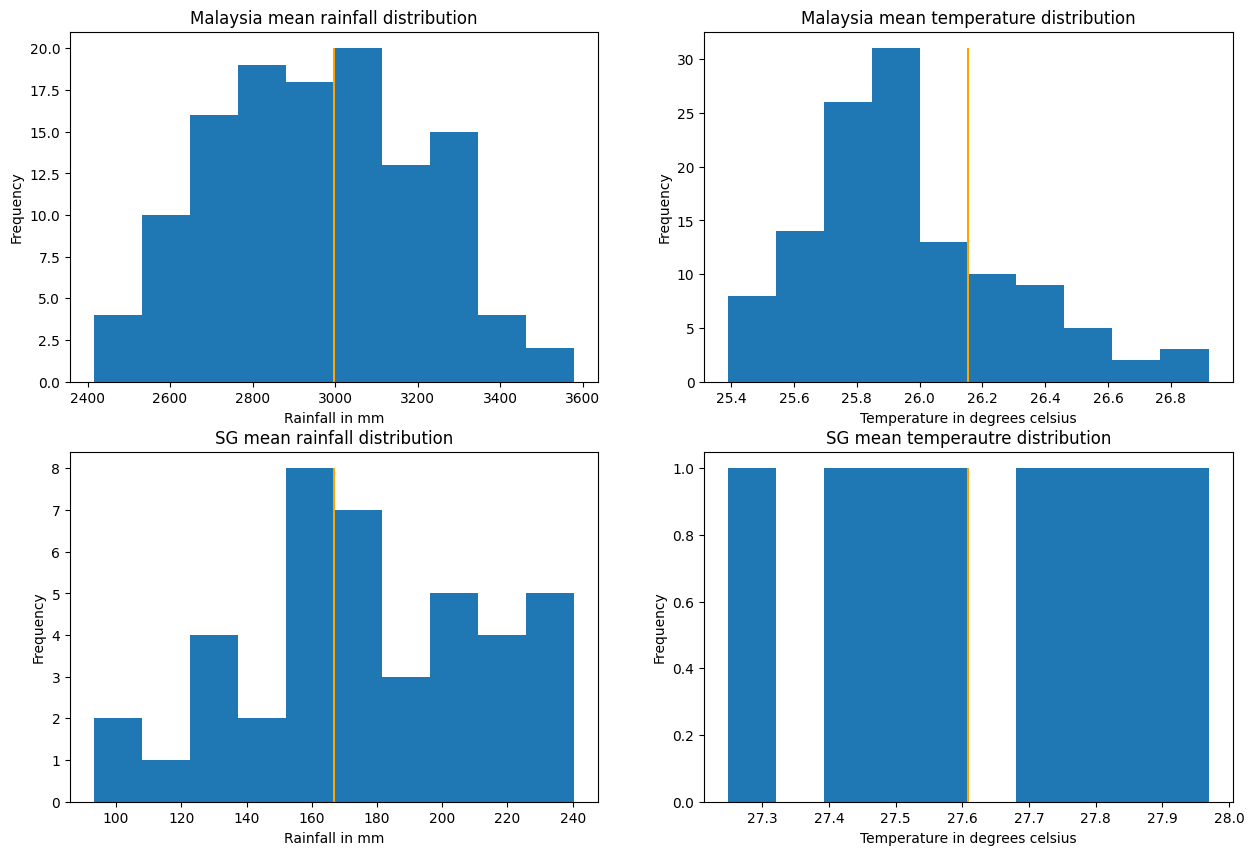

In [584]:
#Visualizing the distribution of overall SG & Malaysia's climate data
dist_plot(df_My_pcp,df_My_temp,'Malaysia',df_SG_mean_rainfall)

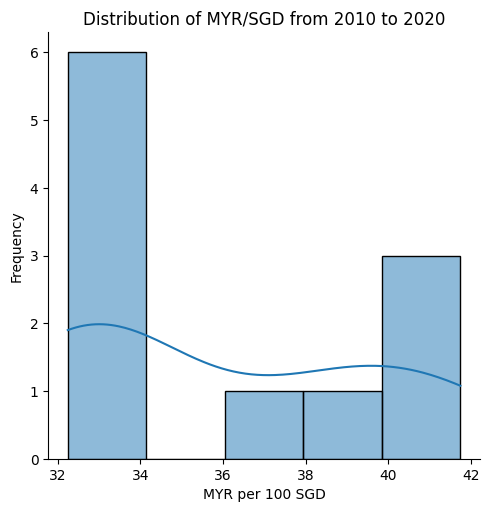

In [585]:
#Distributions of Malaysia exchange rate data
exch_dist('MYR')

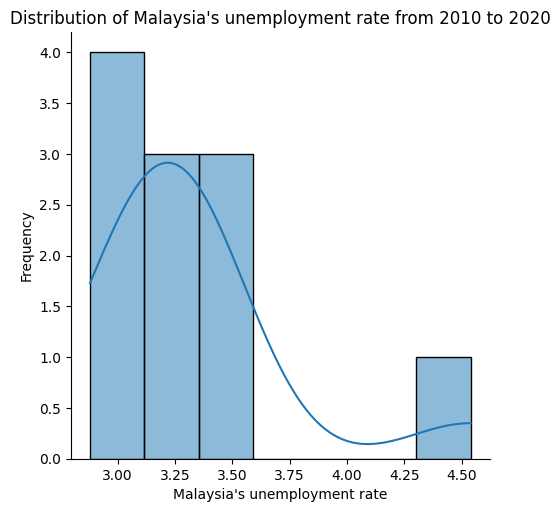

In [586]:
#Distribution of Malaysia unemployment data
unmply_dist('Malaysia')

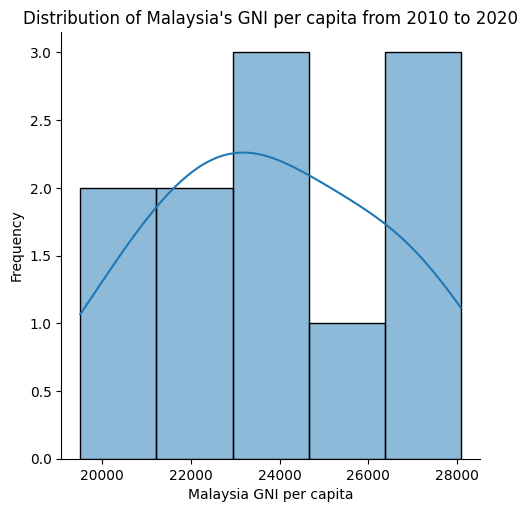

In [587]:
#Distribution of Malaysia's GNI per capita data
GNI_dist('Malaysia')

#### 3.3.5.2 Correlation between investigated factors

In [588]:
#Merging dataframes based on countries
df_Malaysia=merge_df('Malaysia','MYR')

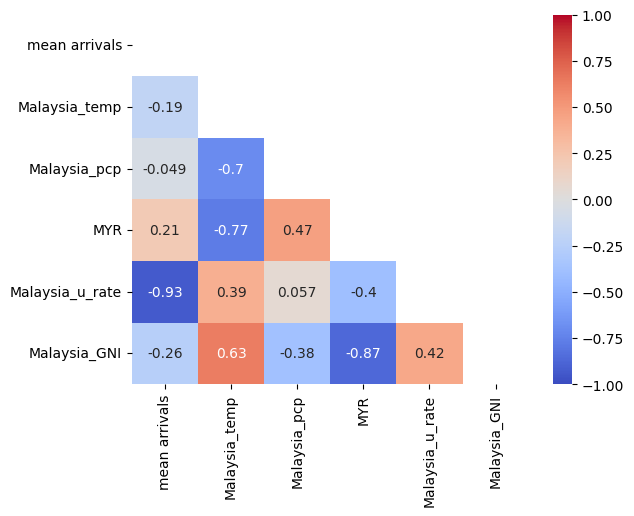

In [589]:
#Investigating the correlation between all factors

#Visualising the correlation with heatmap
heatmap_corr(df_Malaysia)

- Relatively no correlation between climate conditions and tourist arrivals with low correlation coefficient of r=-0.19 and r=-0.049 respectively for mean temperature and precipitation levels.
- Strong inverse relationship between unemployment rate and arrivals with r=-0.93 as expected but weak relationship for other economic factors

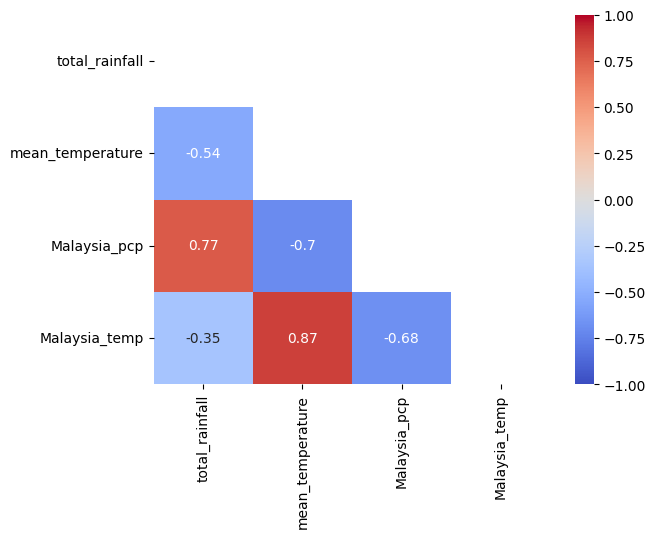

In [590]:
#Correlation between the 2 countries climate

#Merging SG and Malaysia climate datasets to investigate correlation
df_Malaysia=df_Malaysiapcp_10_17.merge(df_Malaysiatemp_10_17,left_index=True, right_index=True,suffixes=['_pcp','_temp'])
df_compare_SG_Malaysia=df_SG.merge(df_Malaysia, left_index=True, right_index=True)

#Visualizing correlation between the country's climate
heatmap_corr(df_compare_SG_Malaysia)

- Strong correlation of climate data as expected givent the proximity of the 2 country's geographical location

### 3.3.6 India

#### 3.3.6.1 Distribution of datasets

In [591]:
#Filtering India's climate data from 2010 to 2017
df_Indiatemp_10_17=df_India_temp.loc[2010:2017][['India']]
df_Indiapcp_10_17=df_India_pcp.loc[2010:2017][['India']]

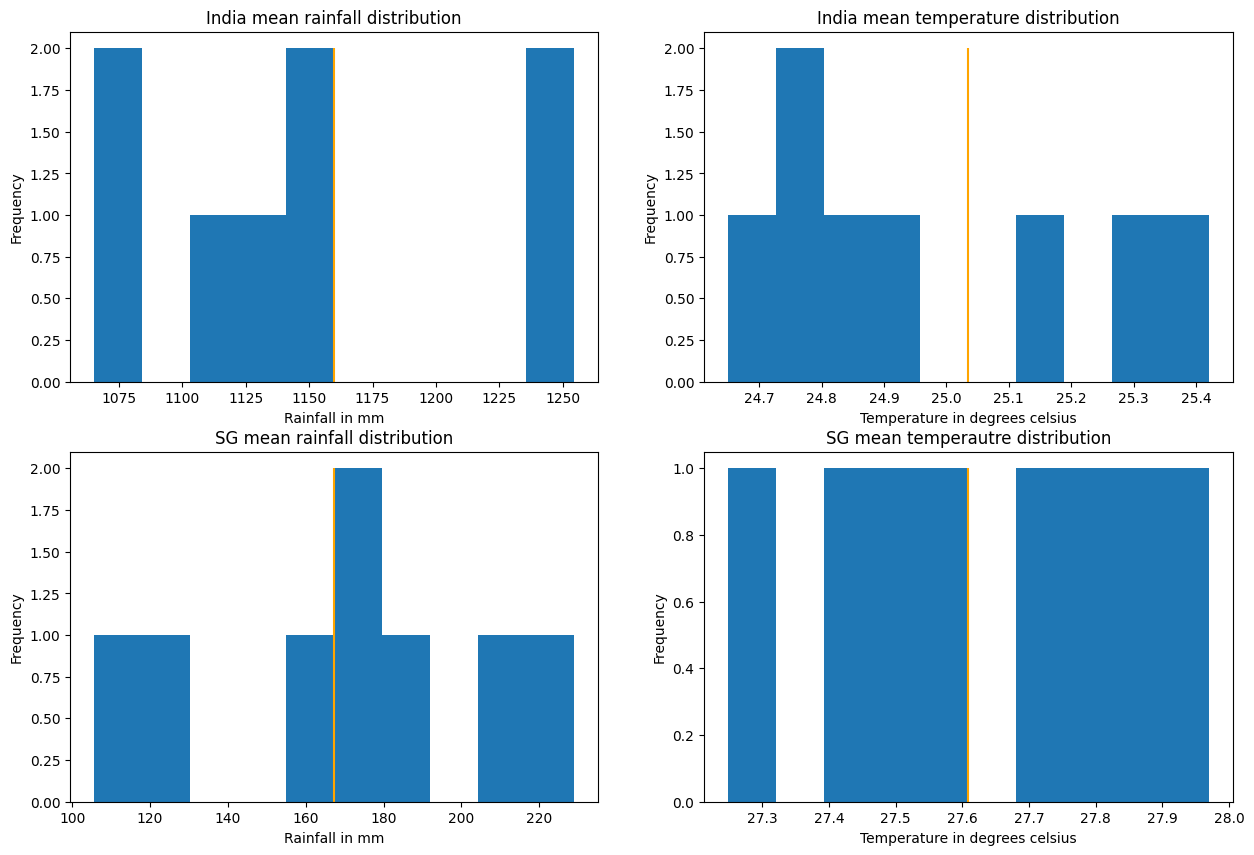

In [592]:
#Visualizing the distribution of SG & India's climate data between 2010 to 2017
dist_plot(df_Indiapcp_10_17,df_Indiatemp_10_17,'India')

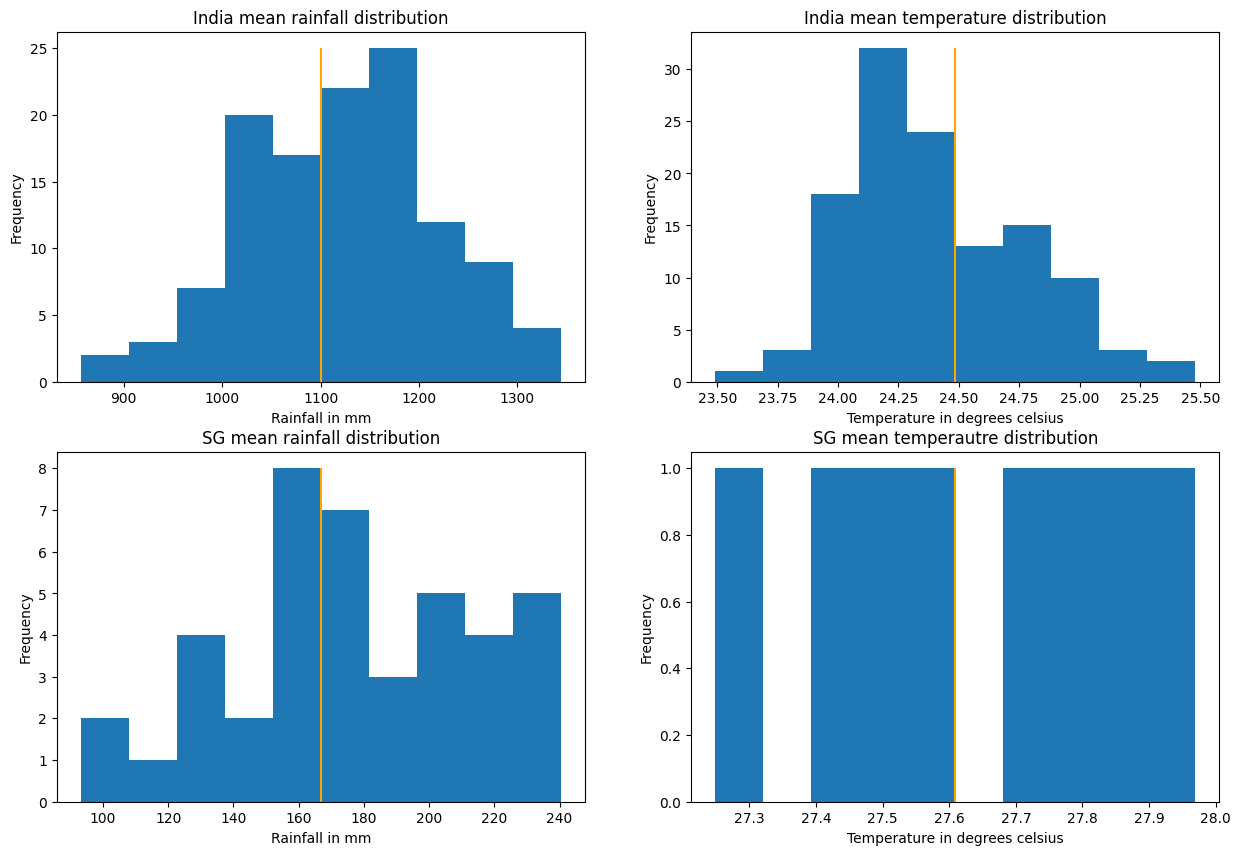

In [593]:
#Visualizing the distribution of overall SG & India's climate data
dist_plot(df_India_pcp,df_India_temp,'India',df_SG_mean_rainfall)

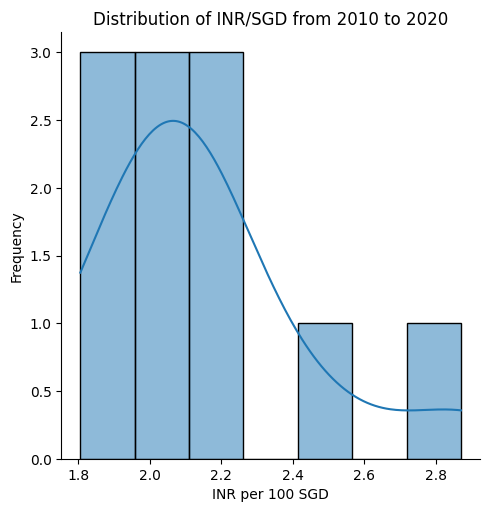

In [594]:
#Distributions of India exchange rate data
exch_dist('INR')

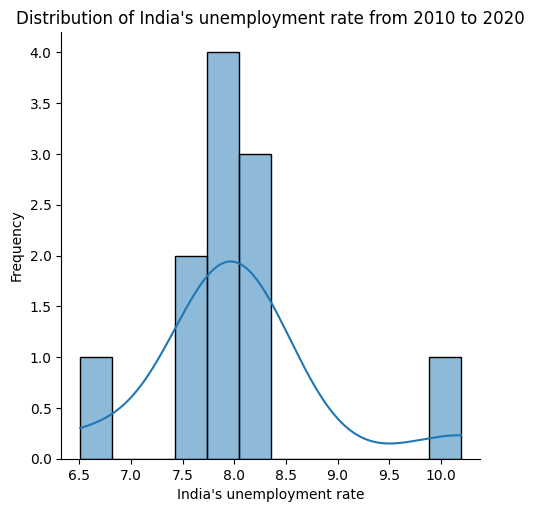

In [595]:
#Distribution of India unemployment data
unmply_dist('India')

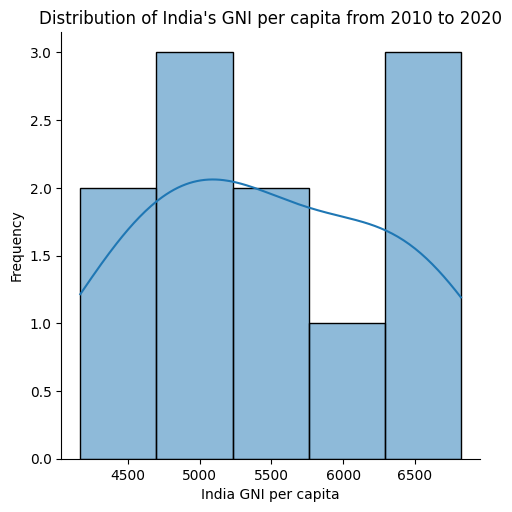

In [596]:
#Distribution of India's GNI per capita data
GNI_dist('India')

#### 3.3.6.2 Correlation between investigated factors

In [597]:
#Merging dataframes based on countries
df_India=merge_df('India','INR')

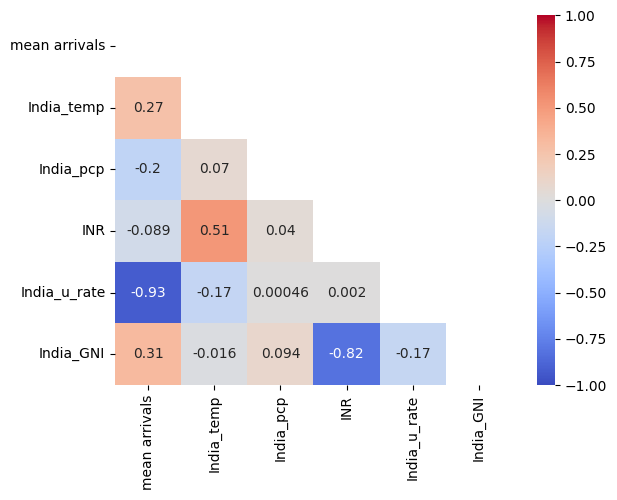

In [598]:
#Investigating the correlation between all factors

#Visualising the correlation with heatmap
heatmap_corr(df_India)

- Weak correlation between climate and tourist arrivals with r=0.27 and r=-0.2 for mean temperature and precipitation respectively
- Strong correlation between unemployment rate and arrivals with r=-0.93 and weak relation for other economic factors

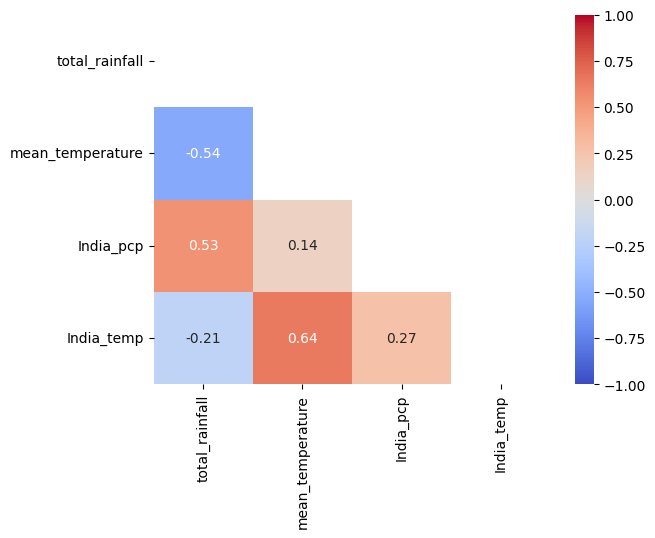

In [599]:
#Correlation between the 2 countries climate

#Merging SG and India climate datasets to investigate correlation
df_India=df_Indiapcp_10_17.merge(df_Indiatemp_10_17,left_index=True, right_index=True,suffixes=['_pcp','_temp'])
df_compare_SG_India=df_SG.merge(df_India, left_index=True, right_index=True)

#Visualizing correlation between the country's climate
heatmap_corr(df_compare_SG_India)

- Weakly strong relationship between climate of the 2 countries

# Part 4. Conclusion

Climate do not seems to be significant in influencing tourist arrival rates whereas economic factors seem to be more significant, mainly Unemployment rate, though there are mixed results on the type of relationship

- More detailed data collection on the geography on tourist arrivals
- Using more sophiscated data analysis model to investigate relationship such as regression
- Analysis can include more countries to have stronger indication on possible relationship and trends
